<div style="display: flex; justify-content: center; align-items: center; padding: 20px;">
    <div style="flex-shrink: 0; display: flex; align-items: center; padding-right: 20px;">
        <img src="https://adnova.novaims.unl.pt/media/22ui3ptm/logo.svg" alt="Nova IMS Logo" style="width: 200px;"/>
    </div>
    <div style="text-align: center;">
        <h1>ABCDEats Inc. - Data Mining Project</h1>
        <h3>Fall Semester 2024-2025</h3>
        <h2>Group 47 Members:</h2>
        <ul style="list-style-type:none; padding: 0;">
            <li>Chiel Groeneveld, 20240662 </li>
            <li>Daan van Holten, 20240681 </li>
            <li>Diogo Ruivo, 20240584 </li>
            <li>Zofia Wójcik, 20240654 </li>
        </ul>
    </div>
</div>


**Table of Contents** <br>
* [1.Project objectives](#projectobjectives)
    * [1.1 Part 1](#part1)
    * [1.2 Dataset](#dataset)
* [2.Import Libraries](#importlibraries)
* [3.Import Dataset](#importdataset)
* [4.Initial Pre-Processing](#initialpreprocessing)
    * [4.1 Duplicated Rows](#duplicatedrows)
    * [4.2 Filling Empty Cells](#fillemptycells)
    * [4.3 Redefining Variables](#redefiningvariables)
* [5.Exploratory Data Analysis](#eda)
    * [5.1 Data Categorization](#datacategorization)
    * [5.2 Feature Analysis](#individualanal)
    * [5.3 New Feature Creation](#newfeature)
    * [5.4 Visualizations](#newfeatureanalysis) #new/more feature analysis ?

<hr>
<a class="anchor" id="projectobjectives">
    
# 1. Project objectives 
    
</a>

In this project, you will act as consultants for ABCDEats Inc. (ABCDE), a fictional food delivery service partnering with a range of restaurants to offer diverse meal options. Your task is to analyse customer data collected over three months from three cities to help ABCDE develop a data-driven strategy tailored to various customer segments. <br>

We recommend segmenting customers using multiple perspectives. Examples of segmentation perspectives include value-based segmentation, which groups customers by their economic value; preference or behaviour-based segmentation which focuses on purchasing habits; and demographic segmentation which categorises customers by attributes like age, gender, and income to understand different interaction patterns. <br>

Ultimately, the company seeks a final segmentation that integrates these perspectives to enable them to develop a comprehensive marketing strategy.

<hr>
<a class="anchor" id="part1">
    
## 1.1 Part 1
    
</a>

Part 1: Exploratory Data Analysis <br>

**Expected Outcomes**
- Conduct an in-depth exploration of the dataset.
Summarise key statistics for the data, and discuss
their possible implications.
- Identify any trends, patterns, or anomalies within
the dataset. Explore relationships between features.
- Create new features that may help enhance your
analysis.
- Use visualisations to effectively communicate
your findings.

<hr>
<a class="anchor" id="dataset">
    
## 1.2 Dataset
    
</a>

The dataset provided for this project includes customer data from ABCDEats Inc. and consists of multiple columns capturing various customer attributes and aggregating their behaviour over a three-month period. <br>
Each row corresponds to one customer, and the column descriptions are given below:

# Dataset Description

| Column Number | Column Name         | Description                                                                                          |
|---------------|---------------------|------------------------------------------------------------------------------------------------------|
| 1             | customer_id         | Unique identifier for each customer.                                                                 |
| 2             | customer_region     | Geographic region where the customer is located.                                                     |
| 3             | customer_age        | Age of the customer.                                                                                 |
| 4             | vendor_count        | Number of unique vendors the customer has ordered from.                                              |
| 5             | product_count       | Total number of products the customer has ordered.                                                   |
| 6             | is_chain            | Indicates whether the customer’s order was from a chain restaurant.                                  |
| 7             | first_order         | Number of days from the start of the dataset when the customer first placed an order.                |
| 8             | last_order          | Number of days from the start of the dataset when the customer most recently placed an order.        |
| 9             | last_promo          | The category of the promotion or discount most recently used by the customer.                        |
| 10            | payment_method      | Method most recently used by the customer to pay for their orders.                                   |
| 11            | CUI_American, CUI_Asian, CUI_Chinese, CUI_Italian, etc. | The amount in monetary units spent by the customer from the indicated type of cuisine.          |
| 12            | DOW_0 to DOW_6      | Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).                          |
| 13            | HR_0 to HR_23       | Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).                      |


<hr>
<a class="anchor" id="importlibraries">
    
# 2. Import libraries
    
</a>

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skewnorm
from sklearn.preprocessing import MinMaxScaler

import math
from math import ceil

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

sns.set()

<hr>
<a class="anchor" id="importdataset">
    
# 3. Import Dataset
    
</a>

In [2]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

<hr>
<a class="anchor" id="initialpreprocessing">
    
# 4. Initial Pre-Processing
    
</a>

In [3]:
df.head(30)

customer_id customer_region  customer_age  vendor_count  product_count  \
0   1b8f824d5e            2360          18.0             2              5   
1   5d272b9dcb            8670          17.0             2              2   
2   f6d1b2ba63            4660          38.0             1              2   
3   180c632ed8            4660           NaN             2              3   
4   4eb37a6705            4660          20.0             2              5   
5   6aef2b6726            8670          40.0             2              2   
6   8475ee66ef            2440          24.0             2              2   
7   f2f53bcc67            8670          27.0             2              3   
8   5b650c89cc            2360          20.0             3              4   
9   84775a7237            8670          20.0             2              3   
10  dd4bcde51a            2360          20.0             2              4   
11  4eff9f04bf            4660          18.0             2              3   
12  8733352e37               -          33.0             2              3   
13  dce8e4700a            8670          26.0             2              2   
14  f3070b7bbf            2360          21.0             2              2   
15  f49ed5489a            8670          51.0             2              2   
16  7c027ecfd3            4660          35.0             1              2   
17  7d9a62afd6            2440          27.0             2              3   
18  d5ef759319            8670          22.0             3              4   
19  dd27b47fb5            4660          31.0             2              2   
20  e79f867434            8670          15.0             2              3   
21  eb13ad08ad            8670          47.0             4              6   
22  fd1202393e            2360          24.0             2              3   
23  1f1fe12bed            8670          26.0             5              6   
24  29786040d4            4140          22.0             2              2   
25  47e04c1274            2360          24.0             2              3   
26  68e63f5236            2360          31.0             2              3   
27  8e8652bdc8            4660           NaN             2              3   
28  b92ab1eeec            2360          47.0             5              6   
29  ccd38a80b8            2360          35.0             2              3   

    is_chain  first_order  last_order last_promo payment_method  ...  HR_14  \
0          1          0.0           1   DELIVERY           DIGI  ...      0   
1          2          0.0           1   DISCOUNT           DIGI  ...      0   
2          2          0.0           1   DISCOUNT           CASH  ...      0   
3          1          0.0           2   DELIVERY           DIGI  ...      1   
4          0          0.0           2          -           DIGI  ...      0   
5          0          0.0           2    FREEBIE           DIGI  ...      0   
6          2          0.0           2          -           CARD  ...      0   
7          2          0.0           2   DISCOUNT           DIGI  ...      0   
8          2          0.0           3   DISCOUNT           DIGI  ...      0   
9          0          0.0           3   DELIVERY           CARD  ...      0   
10         2          0.0           3   DELIVERY           CASH  ...      0   
11         1          0.0           4   DELIVERY           CARD  ...      0   
12         1          0.0           4   DISCOUNT           DIGI  ...      0   
13         0          0.0           4          -           DIGI  ...      0   
14         2          0.0           4          -           CASH  ...      0   
15         2          0.0           4    FREEBIE           CARD  ...      0   
16         2          0.0           5   DELIVERY           CASH  ...      0   
17         2          0.0           5          -           DIGI  ...      0   
18         2          0.0           5   DELIVERY           DIGI  ...      0   
19         1          0.0          

In [4]:
df.shape

(31888, 56)

In [5]:
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [7]:
df.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [8]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [9]:
df.describe(include = 'all').T

count unique         top   freq       mean  \
customer_id                 31888  31875  742ca068fc      2        NaN   
customer_region             31888      9        8670   9761        NaN   
customer_age              31161.0    NaN         NaN    NaN  27.506499   
vendor_count              31888.0    NaN         NaN    NaN   3.102609   
product_count             31888.0    NaN         NaN    NaN   5.668245   
is_chain                  31888.0    NaN         NaN    NaN   2.818866   
first_order               31782.0    NaN         NaN    NaN  28.478604   
last_order                31888.0    NaN         NaN    NaN  63.675521   
last_promo                  31888      4           -  16748        NaN   
payment_method              31888      3        CARD  20161        NaN   
CUI_American              31888.0    NaN         NaN    NaN   4.880438   
CUI_Asian                 31888.0    NaN         NaN    NaN   9.960451   
CUI_Beverages             31888.0    NaN         NaN    NaN   2.300633   
CUI_Cafe                  31888.0    NaN         NaN    NaN   0.801163   
CUI_Chicken Dishes        31888.0    NaN         NaN    NaN   0.768096   
CUI_Chinese               31888.0    NaN         NaN    NaN   1.431218   
CUI_Desserts              31888.0    NaN         NaN    NaN   0.884359   
CUI_Healthy               31888.0    NaN         NaN    NaN   0.950203   
CUI_Indian                31888.0    NaN         NaN    NaN   1.631153   
CUI_Italian               31888.0    NaN         NaN    NaN   3.233411   
CUI_Japanese              31888.0    NaN         NaN    NaN   2.995379   
CUI_Noodle Dishes         31888.0    NaN         NaN    NaN   0.711676   
CUI_OTHER                 31888.0    NaN         NaN    NaN   2.999913   
CUI_Street Food / Snacks  31888.0    NaN         NaN    NaN   3.913253   
CUI_Thai                  31888.0    NaN         NaN    NaN   0.841697   
DOW_0                     31888.0    NaN         NaN    NaN   0.555914   
DOW_1                     31888.0    NaN         NaN    NaN   0.567486   
DOW_2                     31888.0    NaN         NaN    NaN   0.591006   
DOW_3                     31888.0    NaN         NaN    NaN   0.619449   
DOW_4                     31888.0    NaN         NaN    NaN   0.677747   
DOW_5                     31888.0    NaN         NaN    NaN   0.652973   
DOW_6                     31888.0    NaN         NaN    NaN   0.704246   
HR_0                      30723.0    NaN         NaN    NaN        0.0   
HR_1                      31888.0    NaN         NaN    NaN   0.053845   
HR_2                      31888.0    NaN         NaN    NaN    0.06319   
HR_3                      31888.0    NaN         NaN    NaN   0.118759   
HR_4                      31888.0    NaN         NaN    NaN     0.1017   
HR_5                      31888.0    NaN         NaN    NaN   0.081943   
HR_6                      31888.0    NaN         NaN    NaN   0.069681   
HR_7                      31888.0    NaN         NaN    NaN     0.0768   
HR_8                      31888.0    NaN         NaN    NaN   0.131899   
HR_9                      31888.0    NaN         NaN    NaN   0.233912   
HR_10                     31888.0    NaN         NaN    NaN    0.32956   
HR_11                     31888.0    NaN         NaN    NaN   0.378167   
HR_12                     31888.0    NaN         NaN    NaN   0.314162   
HR_13                     31888.0    NaN         NaN    NaN   0.236453   
HR_14                     31888.0    NaN         NaN    NaN    0.21563   
HR_15                     31888.0    NaN         NaN    NaN   0.277032   
HR_16                     31888.0    NaN         NaN    NaN   0.356435   
HR_17                     31888.0    NaN         NaN    NaN   0.390962   
HR_18                     31888.0    NaN         NaN    NaN   0.336961   
HR_19                     31888.0    NaN         NaN    NaN    0.24561   
HR_20                     31888.0    NaN         NaN    NaN   0.142812   
HR_21                     31888.

In [10]:
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

<hr>
<a class="anchor" id="duplicatedrows">
    
## 4.1 Duplicated Rows
    
</a>

In [11]:
#costumer id should be a unique feature, as freq = 2, we know there are duplicates
duplicates_customer_id = df['customer_id'].groupby(df['customer_id']).size()[df['customer_id'].groupby(df['customer_id']).size() > 1]
duplicates_customer_id.count()

13

In [12]:
#check if only customer id is dulpicated, or the whole row
df.duplicated().sum() #not only the customer id, the whole row is duplicated, we should eliminate them

13

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum() #check

0

In [15]:
#after removing duplicate customer id's, we can drop the customer_id column and assume the index (1,2,3...) as their new id
df = df.iloc[0:, 1:56]

<hr>
<a class="anchor" id="fillemptycells">
    
## 4.2 Filling Empty Cells
    
</a>

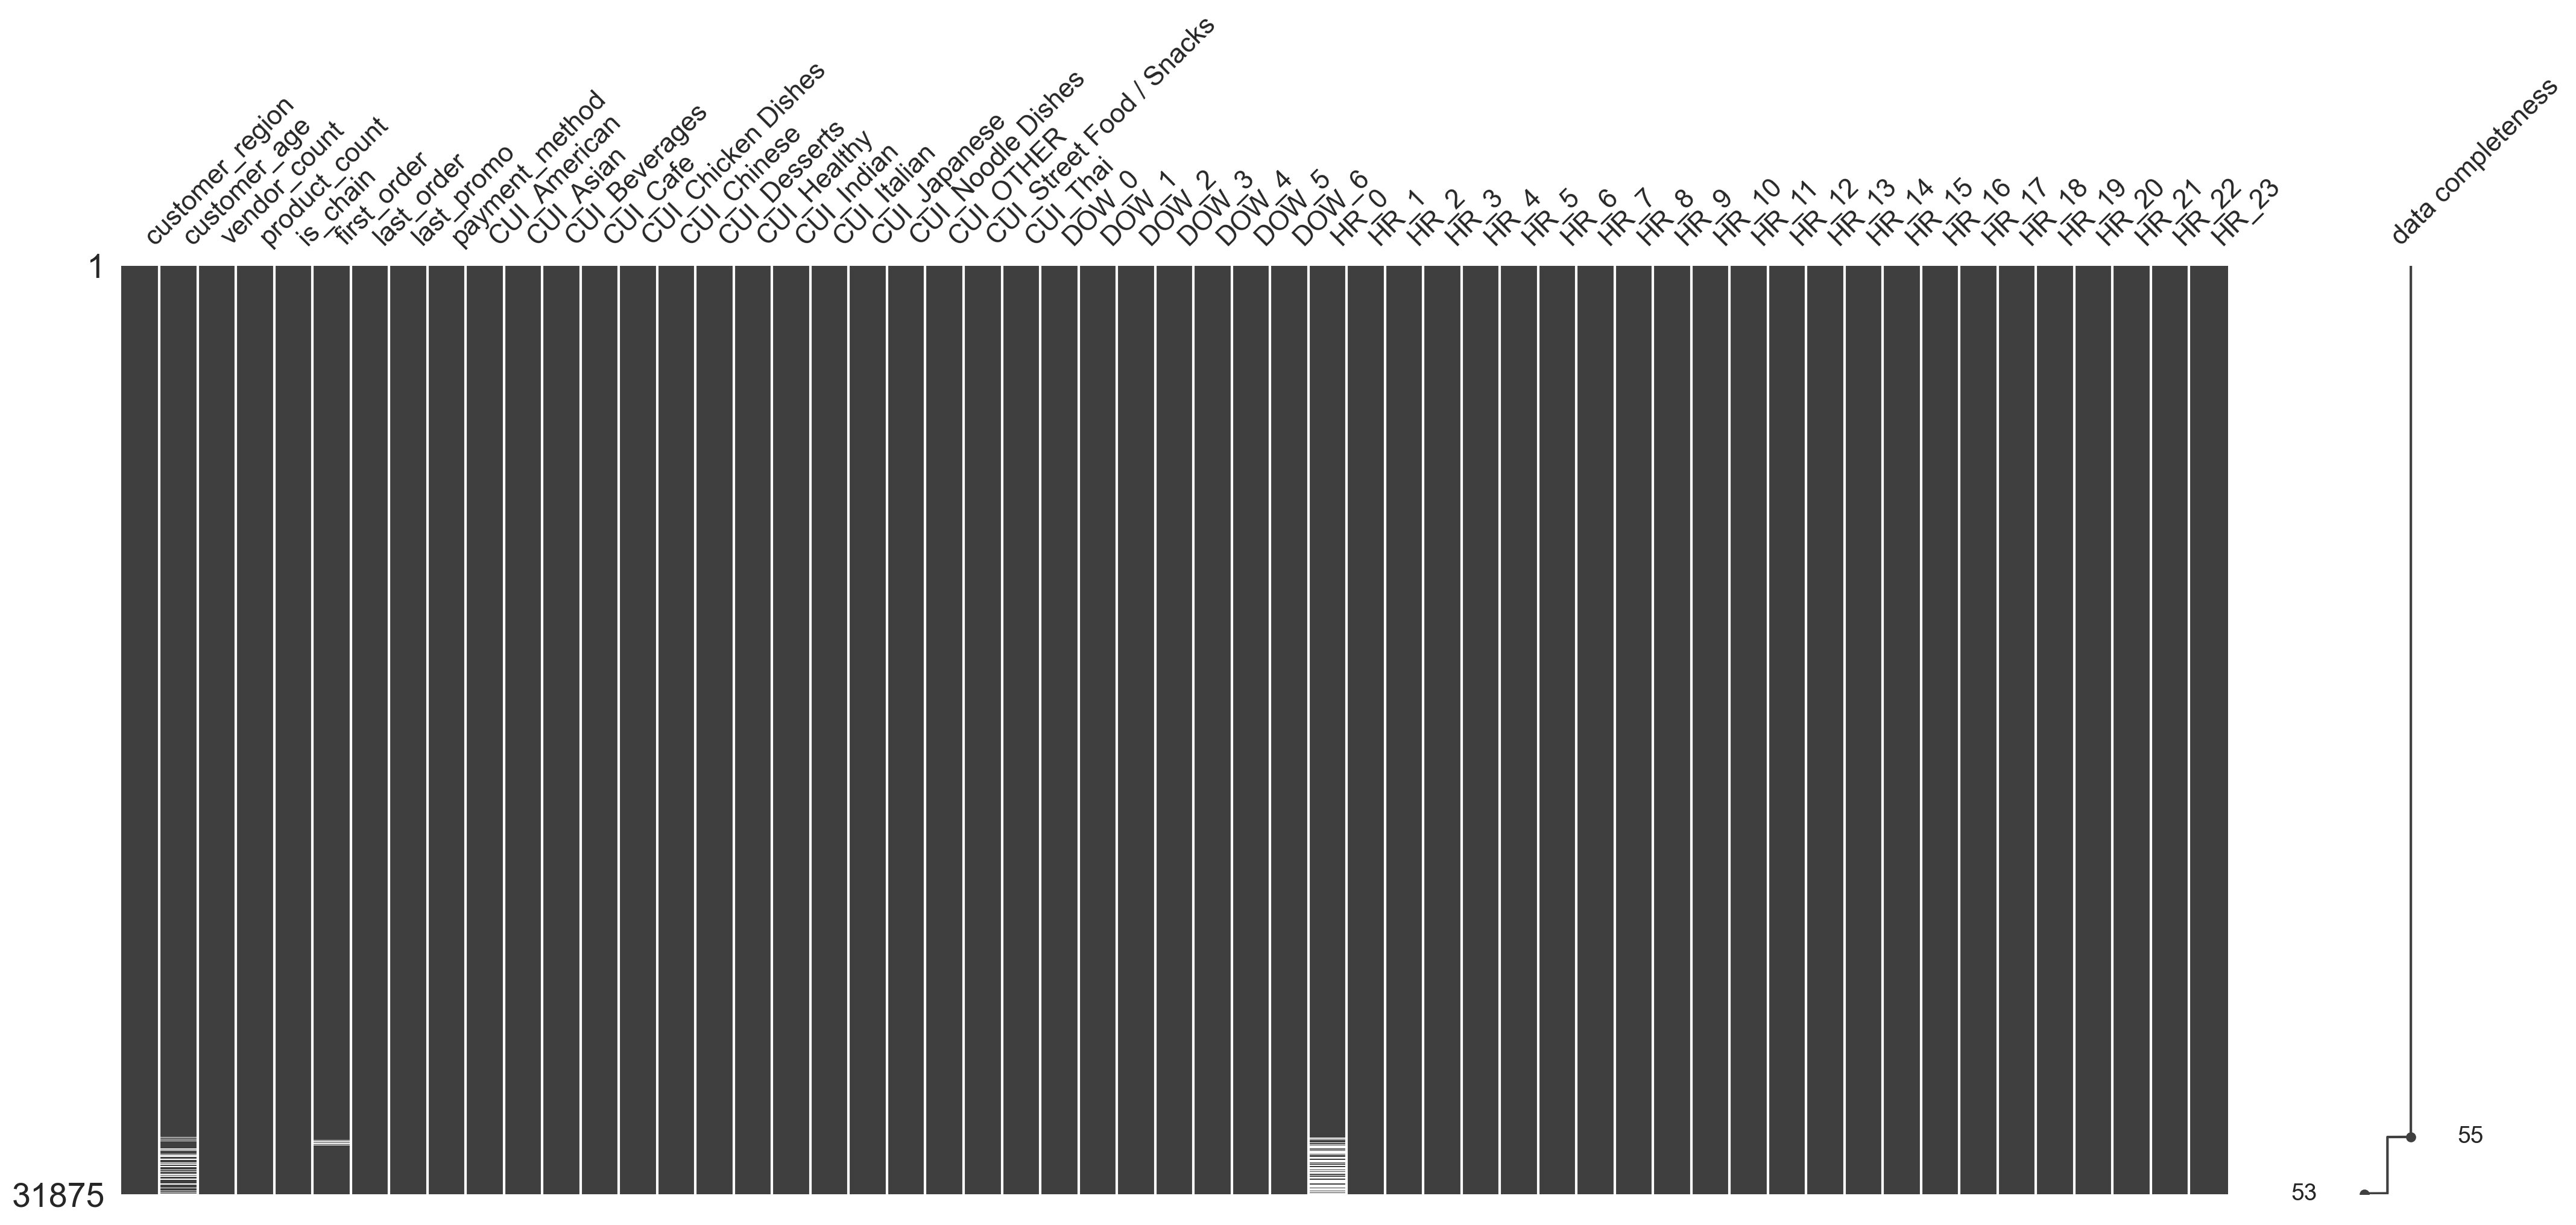

In [16]:
# Visualize the missing values in the dataset
msno.matrix(df, labels=True, sort="descending");

In [17]:
# Check the missing values in rows instead of columns
df.isnull().sum(axis=1).value_counts().sort_index(ascending=False)

2       30
1     1937
0    29908
Name: count, dtype: int64

In [18]:
#there are 3 columns with NaN values, we will treat all of them as it is necessary for data visualization
df.isna().sum()

customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5                          0
DOW_6     

#### customer_Age

In [19]:
#decide on wether to turn nan into median or mean, we see which one is smaller and choose it
print(f'median: {df["customer_age"].median()}')
print(f'mean: {df["customer_age"].mean()}')

median: 26.0
mean: 27.50754462565815


In [20]:
# we decided to fill with the median
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)

#### first_order

In [21]:
# we suspect that NaNs for first_order just did their first_order today
print(df[df['first_order'].isna()]['last_order'].value_counts()) # as we can see all last_order is set to 0
print(df[df['first_order'].isna()]
      [['DOW_0','DOW_1','DOW_2','DOW_3','DOW_4','DOW_5','DOW_6']].value_counts()) 
# we can even see that the dataset was concluded on a sunday
# given this information, we will set these NaNs as the day next to the max value in the 'first_order' values

last_order
0    106
Name: count, dtype: int64
DOW_0  DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6
0      0      0      0      0      0      1        104
                                          2          2
Name: count, dtype: int64


In [22]:
# given this information, we will set these NaNs as the day next to the max value in the 'first_order' values
df['first_order'].max()

90.0

In [23]:
df['first_order'].fillna(91, inplace=True)

#### HR_0

In [24]:
# for HR_0
Total_Orders_Week = df.iloc[:, 24:31].sum(axis=1) #sum all DOW columns
Total_Orders_Hour = df.iloc[:, 32:-1].sum(axis=1) #sum all HR columns, dont count HR_0 as it is full of zeros
df['HR_0'] = Total_Orders_Week - Total_Orders_Hour

In [25]:
df.isna().sum()

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2      

In [26]:
# Check the missing values in rows again
df.isnull().sum(axis=1).value_counts().sort_index(ascending=False)

0    31875
Name: count, dtype: int64

In [27]:
df.describe()

customer_age  vendor_count  product_count      is_chain   first_order  \
count  31875.000000  31875.000000   31875.000000  31875.000000  31875.000000   
mean      27.473161      3.102714       5.668424      2.819357     28.677867   
std        7.083258      2.771753       6.957933      3.977977     24.332295   
min       15.000000      0.000000       0.000000      0.000000      0.000000   
25%       23.000000      1.000000       2.000000      1.000000      7.000000   
50%       26.000000      2.000000       3.000000      2.000000     22.000000   
75%       31.000000      4.000000       7.000000      3.000000     45.000000   
max       80.000000     41.000000     269.000000     83.000000     91.000000   

         last_order  CUI_American     CUI_Asian  CUI_Beverages      CUI_Cafe  \
count  31875.000000  31875.000000  31875.000000   31875.000000  31875.000000   
mean      63.672376      4.877205      9.955306       2.298224      0.801490   
std       23.227992     11.647043     23.561492       8.475868      6.428422   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%       49.000000      0.000000      0.000000       0.000000      0.000000   
50%       70.000000      0.000000      0.000000       0.000000      0.000000   
75%       83.000000      5.660000     11.830000       0.000000      0.000000   
max       90.000000    280.210000    896.710000     229.220000    326.100000   

       ...         HR_14         HR_15         HR_16         HR_17  \
count  ...  31875.000000  31875.000000  31875.000000  31875.000000   
mean   ...      0.215686      0.277114      0.356580      0.391059   
std    ...      0.599098      0.738282      0.874598      0.943873   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     13.000000     23.000000     22.000000     20.000000   

              HR_18         HR_19         HR_20         HR_21         HR_22  \
count  31875.000000  31875.000000  31875.000000  31875.000000  31875.000000   
mean       0.337098      0.245678      0.142871      0.071184      0.048282   
std        0.894106      0.795433      0.586641      0.348604      0.298324   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       24.000000     35.000000     36.000000     11.000000     15.000000   

              HR_23  
count  31875.000000  
mean       0.045176  
std        0.282011  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       13.000000  

[8 rows x 52 columns]

In [28]:
hourly_counts = {}

for hour in range(24):
    column_name = f'HR_{hour}'
    if column_name in df.columns:
        hourly_counts[column_name] = df[column_name].value_counts()

# Combine all hourly counts into a single DataFrame
combined_counts = pd.DataFrame(hourly_counts).fillna(0).astype(int)

# Calculate total counts for each hour
total_counts = combined_counts.sum()

# Add total counts as the first row
combined_counts = pd.concat([pd.DataFrame(total_counts, columns=['Total']).T, combined_counts])

# Sort the remaining rows (excluding the 'Total' row) in descending order
combined_counts.iloc[1:] = combined_counts.iloc[1:].sort_values(
    by=combined_counts.columns.tolist(), ascending=False
)

# Display the combined counts
print(combined_counts)

#check if values are in line with surrounding areas - they are
print(combined_counts.describe().transpose())

        HR_0   HR_1   HR_2   HR_3   HR_4   HR_5   HR_6   HR_7   HR_8   HR_9  \
Total  31875  31875  31875  31875  31875  31875  31875  31875  31875  31875   
0      29858  30592  30385  29354  29507  29849  30125  29982  28923  26952   
1       1486   1016   1173   1783   1822   1615   1419   1541   2293   3557   
2        337    181    219    464    376    303    244    262    439    829   
3         91     46     60    163    101     63     59     54    114    280   
4         51     24     14     53     32     28     15     18     44    122   
5         28      7      8     26     18     15      7      5     27     59   
6          9      4      5     16      7      0      3      3     10     26   
7          4      1      1      1      1      0      0      1      2     13   
8          3      1      4      2      3      0      1      3      2      8   
9          3      0      0      2      0      0      0      0      0      3   
10         2      0      1      3      1      0     

<hr>
<a class="anchor" id="redefiningvariables">
    
## 4.3 Redefining Variables
    
</a>

**Redefining DataTypes**

In [29]:
#age, first_order and HR_0 should be integers, the rest seems correct
df['customer_age'] = df['customer_age'].astype('int64')
df['first_order'] =df['first_order'].astype('int64')
df['HR_0'] =df['HR_0'].astype('int64')
df.dtypes

customer_region              object
customer_age                  int64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                   int64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

**Redefining Names**

In [30]:
df.rename(columns={'CUI_Chicken Dishes': 'CUI_Chicken_Dishes'}, inplace=True)
df.rename(columns={'CUI_Noodle Dishes': 'CUI_Noodle_Dishes'}, inplace=True)
df.rename(columns={'CUI_Street Food / Snacks': 'CUI_Street_Food/Snacks'}, inplace=True)

**Redefining Variables**

##### last_order

In [31]:
df['last_order'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90,  9, 15,  0], dtype=int64)

In [32]:
# there should not be 0 in last_order, it is due to the same reason for the missing values on first_order 
print(df[df['last_order']  == 0]['first_order'].value_counts()) # the zeros appear on the day of the dataset snapshot

first_order
91    106
Name: count, dtype: int64


In [33]:
# we should just add 1 to the max of last_order for the rows that appear zero
df_last_order = df[['last_order']]
df_last_order[df_last_order == 0] = 91
df['last_order'] = df_last_order['last_order']
df.tail(10)

customer_region  customer_age  vendor_count  product_count  is_chain  \
31878            8670            23             1              1         1   
31879            8670            24             1              1         0   
31880            4660            23             1              1         0   
31881            8670            32             1              1         1   
31882            8670            21             1              1         1   
31883            8670            30             1              1         1   
31884            8670            26             1              1         0   
31885            8670            24             1              1         1   
31886            8670            34             1              1         0   
31887            4660            30             1              1         0   

       first_order  last_order last_promo payment_method  CUI_American  ...  \
31878           91          91   DELIVERY           CARD          0.00  ...   
31879           91          91   DELIVERY           CARD          0.00  ...   
31880           91          91          -           CARD          0.00  ...   
31881           91          91    FREEBIE           CASH          0.00  ...   
31882           91          91   DELIVERY           DIGI          0.00  ...   
31883           91          91    FREEBIE           DIGI          0.00  ...   
31884           91          91   DELIVERY           DIGI         18.04  ...   
31885           91          91          -           DIGI          0.00  ...   
31886           91          91   DISCOUNT           DIGI          0.00  ...   
31887           91          91          -           CASH          0.00  ...   

       HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
31878      0      0      0      0      0      0      0      0      0      0  
31879      0      0      0      0      0      0      0      0      0      0  
31880      0      1      0      0      0      0      0      0      0      0  
31881      0      0      0      0      0      0      0      0      0      0  
31882      0      0      0      0      0      0      0      0      0      0  
31883      0      0      0      0      0      0      0      0      0      0  
31884      0      0      1      0      0      0      0      0      0      0  
31885      0      0      0      0      0      0      0      0      0      0  
31886      0      0      0      0      0      0      0      0      0      0  
31887      0      0      1      0      0      0      0      0      0      0  

[10 rows x 55 columns]

<hr>
<a class="anchor" id="eda">
    
# 5.Exploratory Data Analysis
    
</a>

<hr>
<a class="anchor" id="datacategorization">
    
## 5.1 Data Categorization
    
</a>

***Days of The Week***

In [34]:
days_of_week = df[['DOW_0', 'DOW_1','DOW_2','DOW_3','DOW_4','DOW_5','DOW_6']]

***Hours of The Day***

In [35]:
hours_of_day = df[['HR_0','HR_1','HR_2','HR_3','HR_4','HR_5','HR_6','HR_7','HR_8','HR_9','HR_10','HR_11','HR_12','HR_13','HR_14','HR_15',
                   'HR_16','HR_17','HR_18','HR_19','HR_20','HR_21','HR_22','HR_23']]

***Cuisines***

In [36]:
cuisines = df[['CUI_American', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian'
               , 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai']]

***Categorical Variables***

In [37]:
cat_variables = df[['customer_region', 'last_promo', 'payment_method']]

***Metric Variables***

In [38]:
#excluding hours and days
metric_variables = df[['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']]
#including hours and days
numeric_df = df.select_dtypes(include=['int64', 'float64'])

<hr>
<a class="anchor" id="datacategorization">
    
## 5.2 Feature Analysis
    
</a>

### Histograms

In [112]:
# Function to create a histogram
def create_histogram(data, title, xlabel, ylabel, color='#3498DB', bins=50, edgecolor='black', range=range):
    plt.figure(figsize=(7, 5))
    plt.hist(data, bins=bins, color=color, range=range)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()
    plt.show()

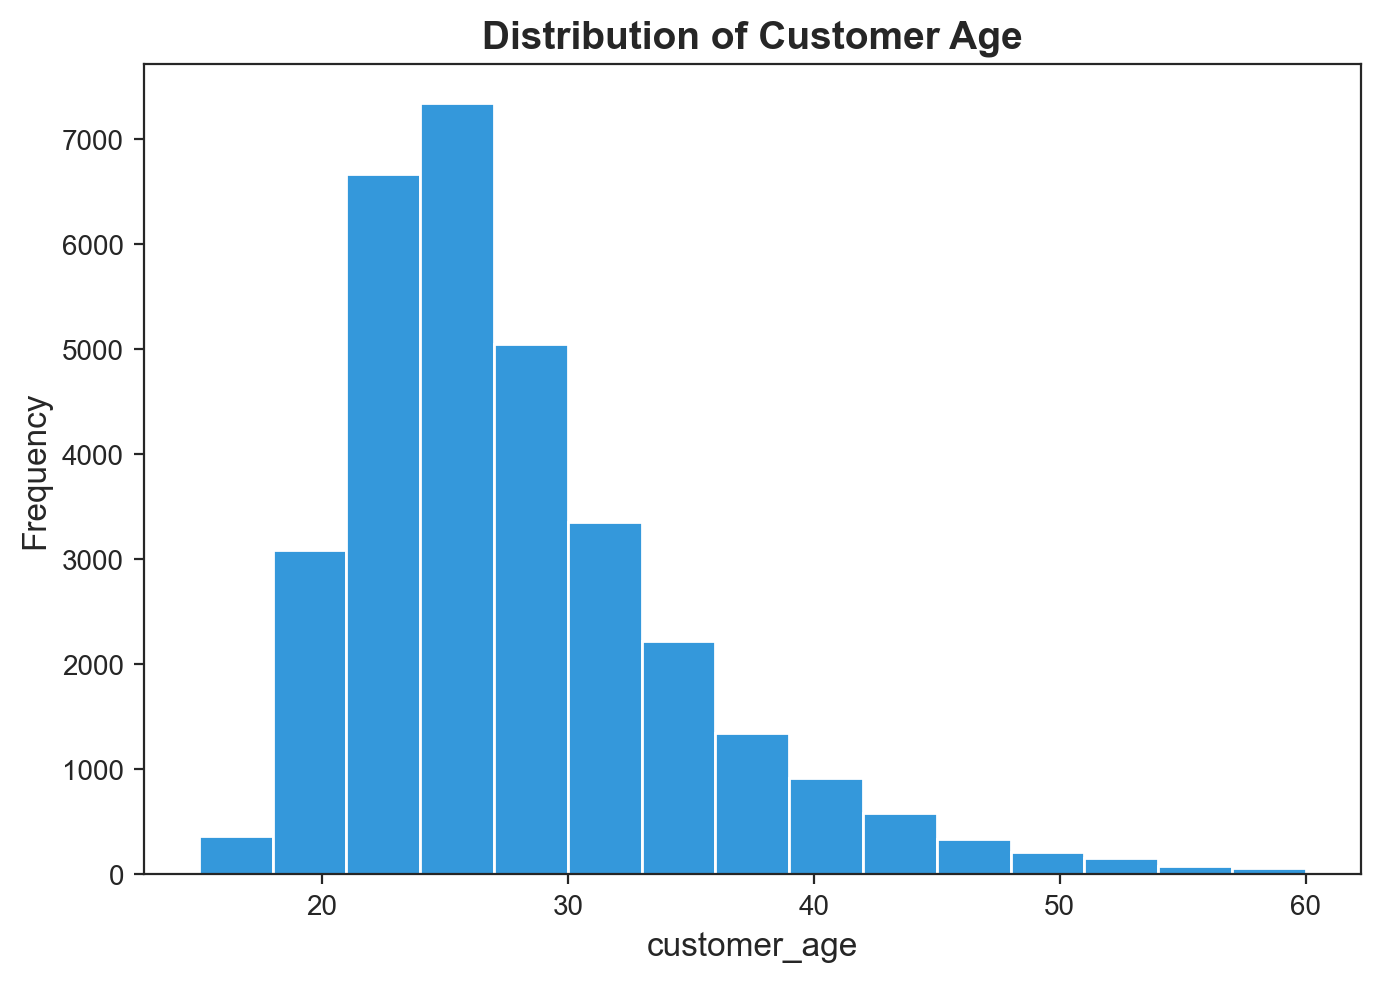

<Figure size 640x480 with 0 Axes>

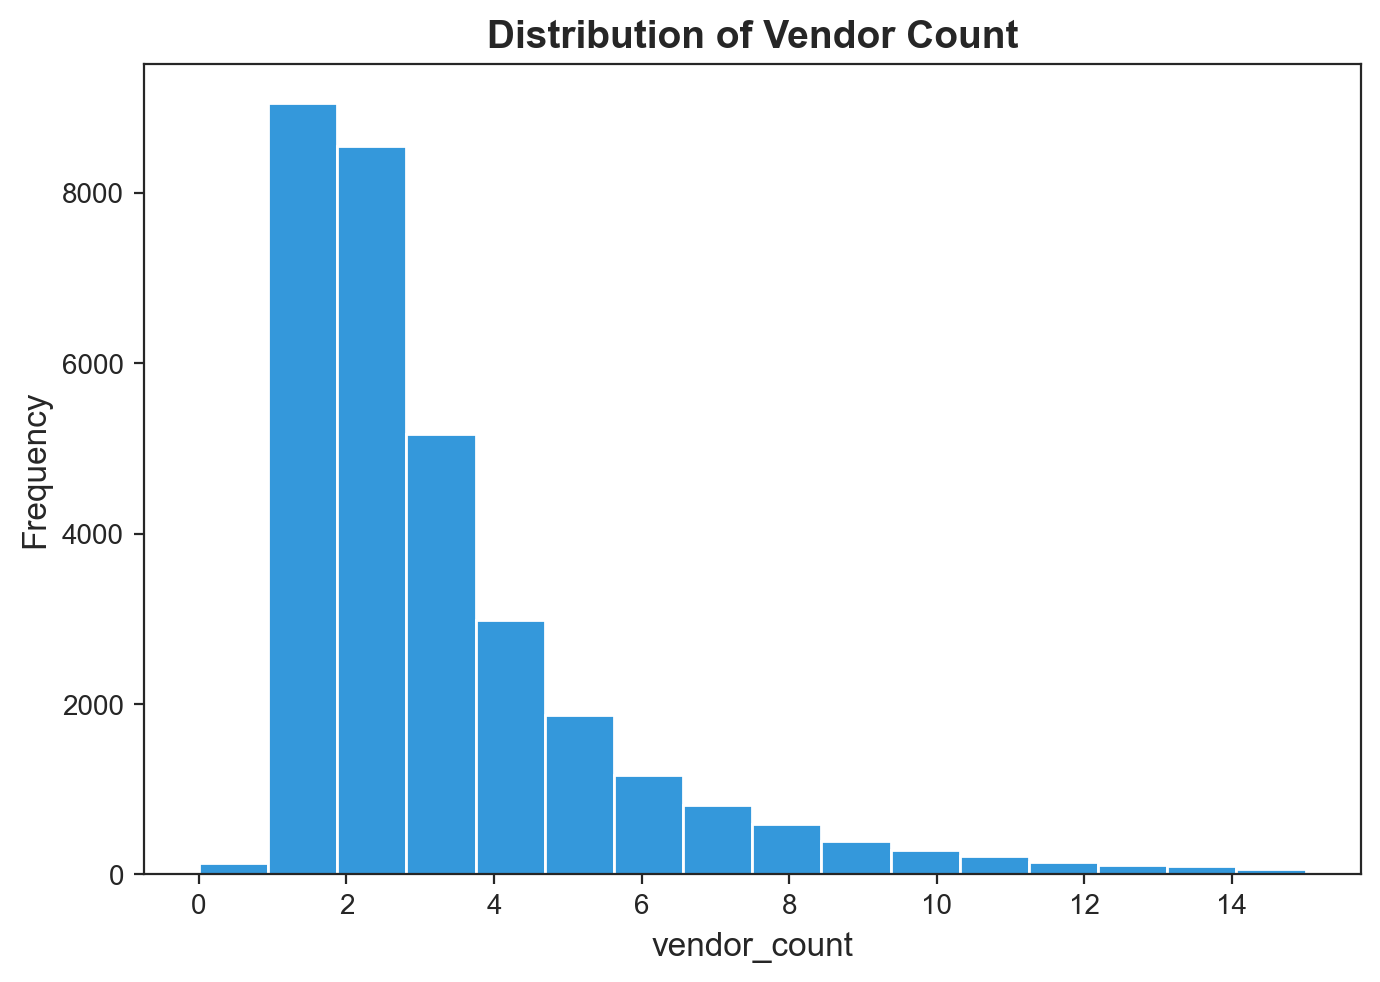

<Figure size 640x480 with 0 Axes>

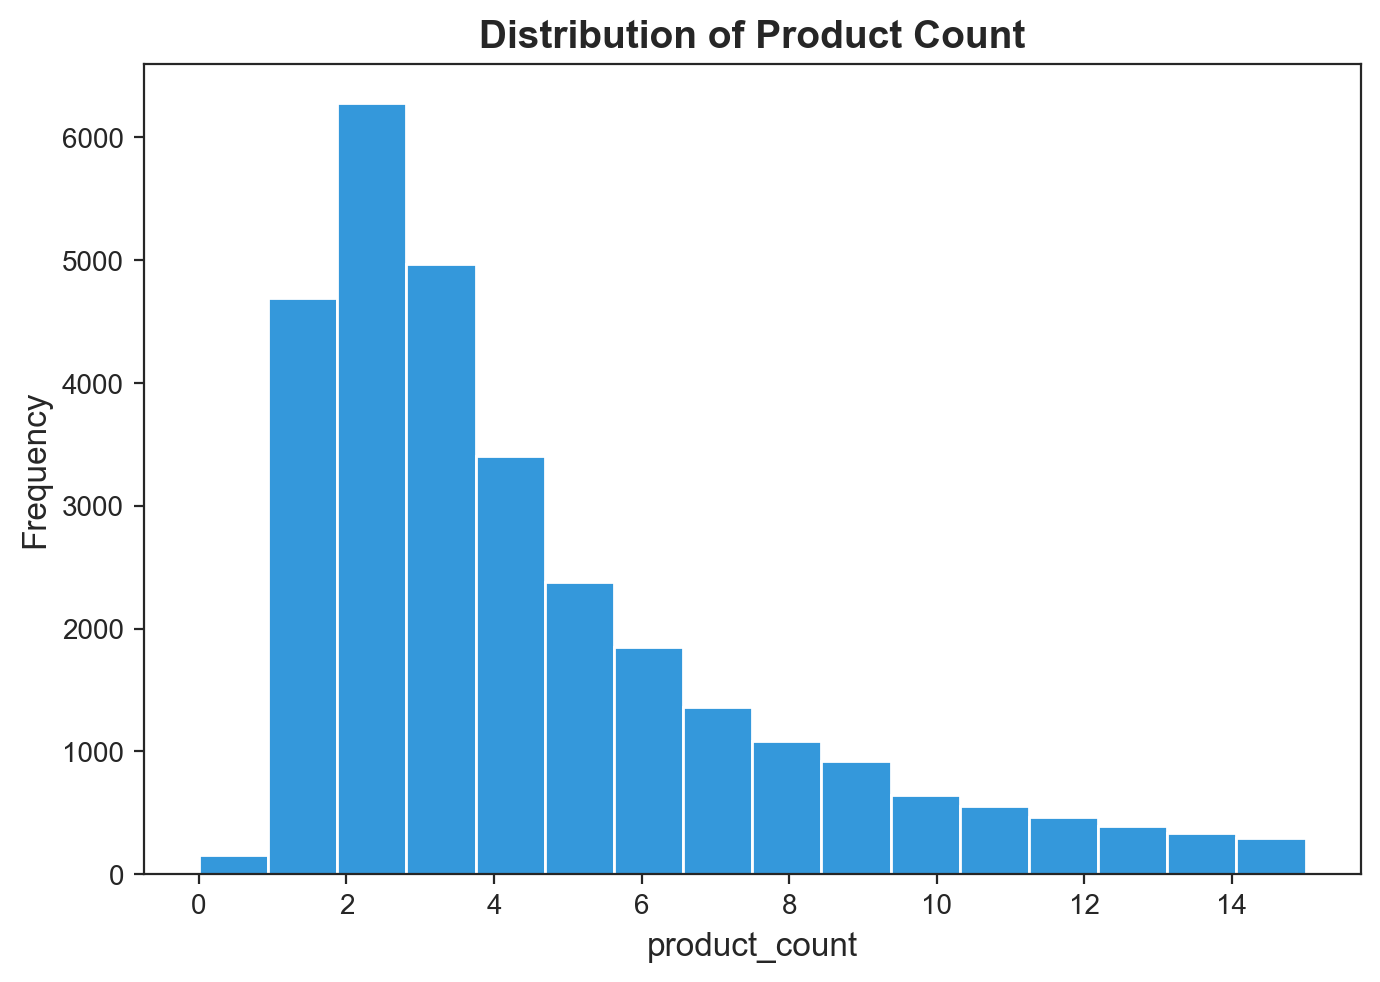

<Figure size 640x480 with 0 Axes>

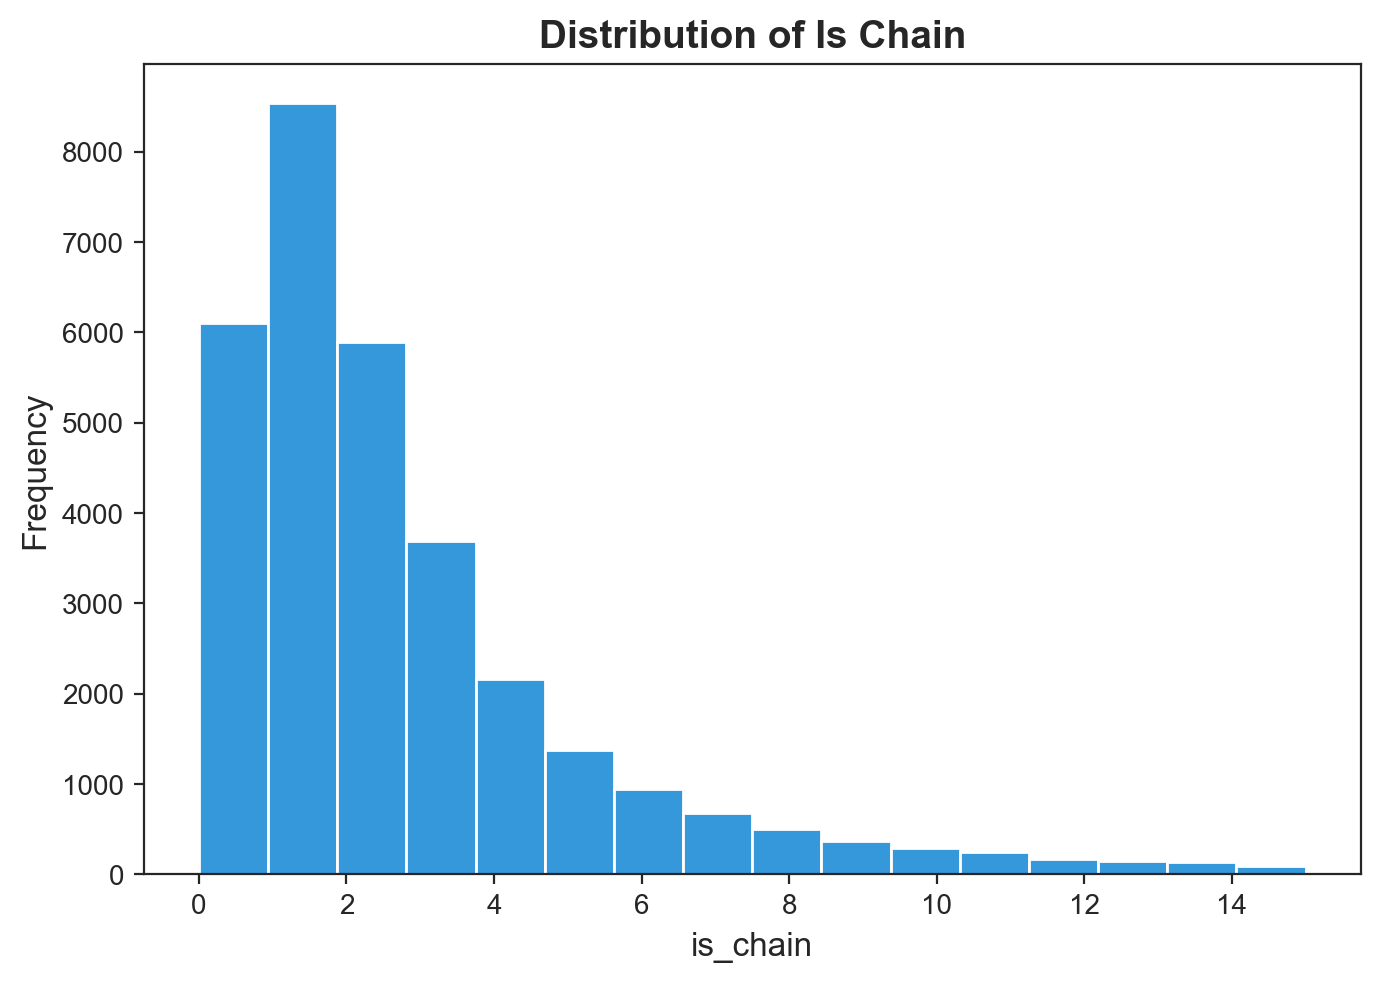

<Figure size 640x480 with 0 Axes>

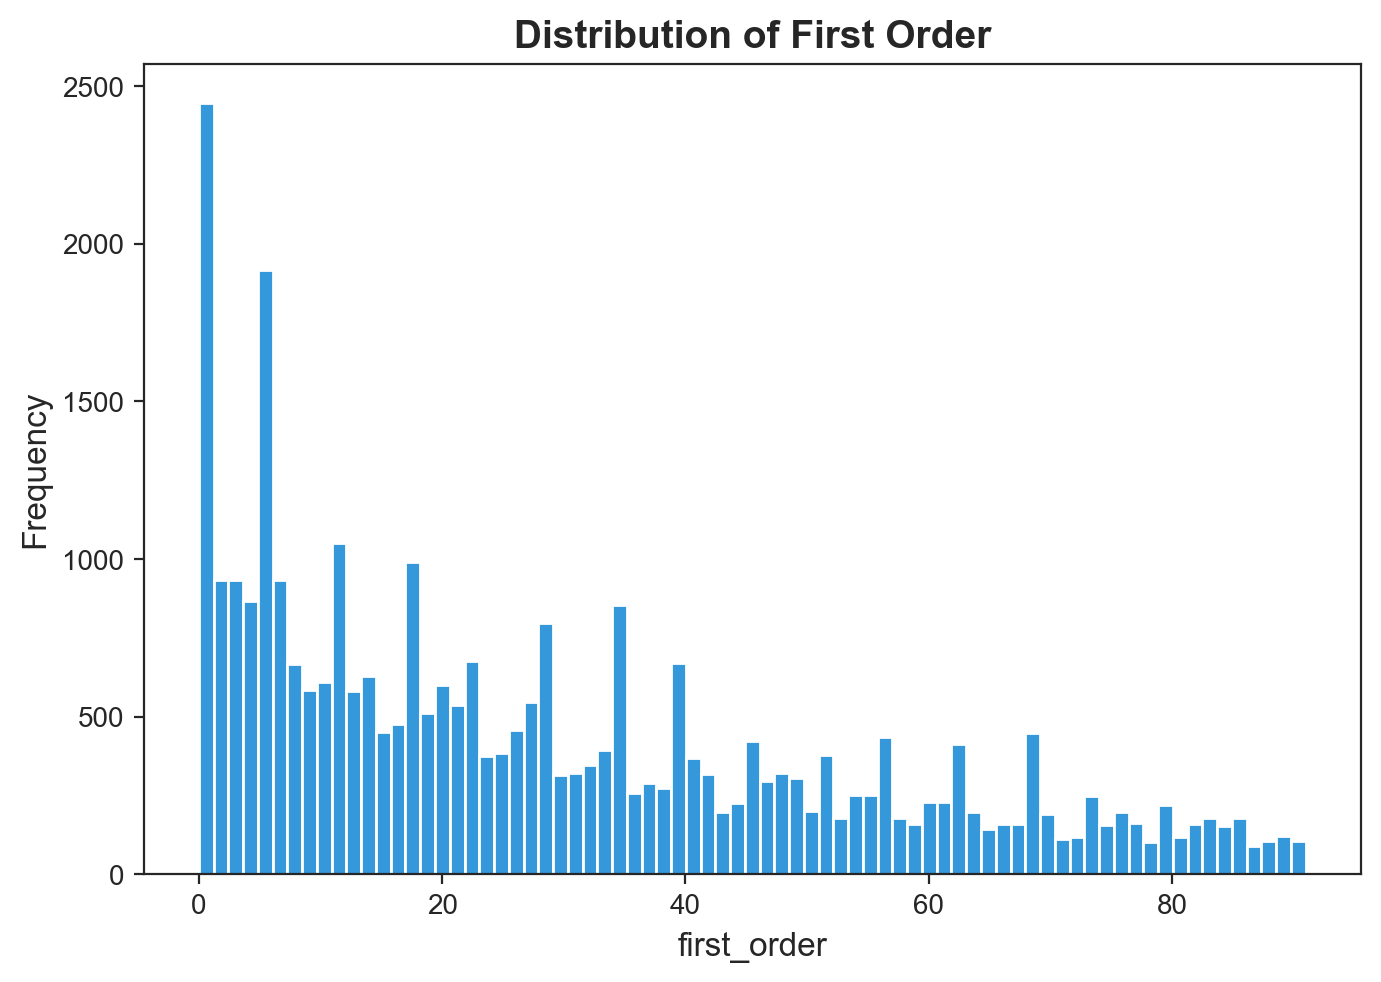

<Figure size 640x480 with 0 Axes>

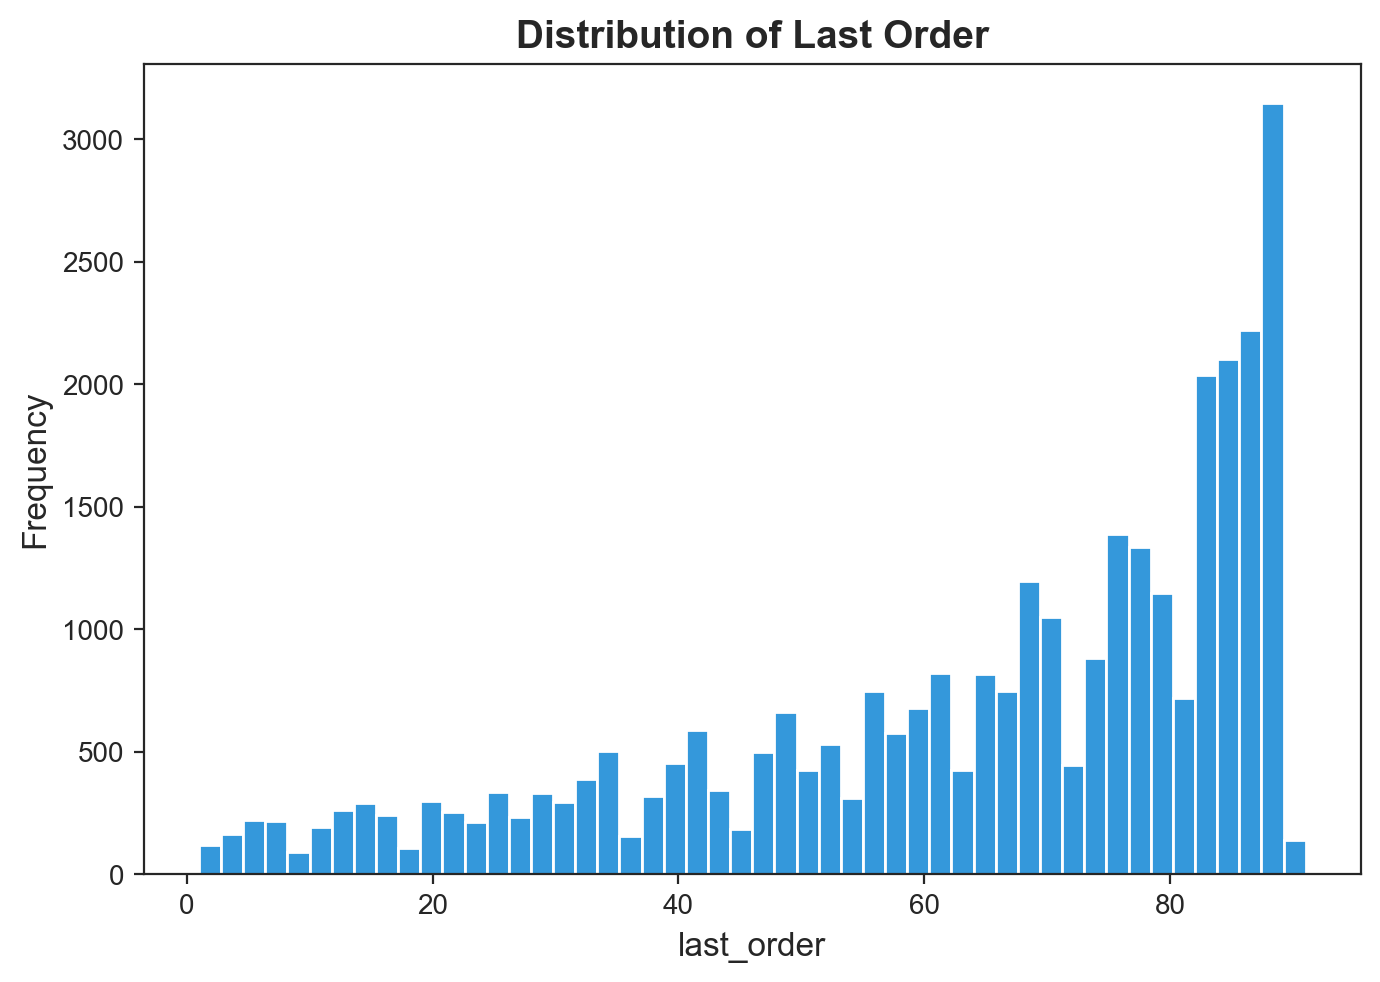

<Figure size 640x480 with 0 Axes>

In [115]:
bin_config = dict([
    ('customer_age', 15),
    ('vendor_count', 16),
    ('product_count', 16),
    ('first_order', 75),
    ('last_order', 50),
    ('is_chain', 16),
])
range_config = dict([
    ('customer_age', (15, 60)),
    ('vendor_count', (0, 15)),
    ('product_count', (0, 15)),
    ('first_order', None),
    ('last_order', None),
    ('is_chain', (0, 15)),
])
sns.set_style('ticks')
for var in metric_variables:
    title = f'Distribution of {var.replace("_", " ").title()}'
    bins = bin_config.get(var,50)
    range_tuple = range_config.get(var, (df[var].min(), df[var].max()))
    create_histogram(df[var], title, var, 'Frequency', bins = bins, range=range_tuple)
    plt.savefig('f{.png')

In [89]:
#function to plot time distributions, both hours and days of week
def plot_time_distribution(df, time_cols, title, color='#3498DB'):
    """
    Plot distribution for time-based columns with improved y-axis scaling.
    """
    counts = [df[col].sum() for col in time_cols]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(counts)), counts, color='#3498DB')
    plt.title(title,fontsize=14, fontweight='bold')

    if len(counts) == 24:  # Hours
        plt.xlabel('Hour of Day')
        plt.xticks(range(24))
        # Set y-axis limits to focus on the meaningful range
        min_count = min(counts) * 0.9
        max_count = max(counts) * 1.1
        plt.ylim(min_count, max_count)
    elif len(counts) == 7:  # Days
        plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
        plt.xticks(range(7))
        # Set y-axis limits for days
        min_count = min(counts) * 0.95
        max_count = max(counts) * 1.05
        plt.ylim(min_count, max_count)

    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [104]:
#function to plot cuisine types
def plot_cuisine_distribution(df, cuisine_columns, title='Distribution of Cuisine Types'):
    """
    Plot distribution of cuisine types with improved formatting.
    """
    cuisine_counts = [df[cuisine].sum() for cuisine in cuisine_columns]

    # Sort cuisines by count for better visualization
    sorted_indices = np.argsort(cuisine_counts)[::-1]
    sorted_counts = [cuisine_counts[i] for i in sorted_indices]
    sorted_cuisines = [cuisine_columns[i] for i in sorted_indices]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(sorted_cuisines)), sorted_counts, color='#3498DB')
    plt.title(title,fontsize=14, fontweight='bold')
    plt.xlabel('Cuisine Type')
    plt.ylabel('Count')

    # Rotate labels and adjust their position
    plt.xticks(range(len(sorted_cuisines)),
               [cuisine.replace('CUI_', '').replace('_', ' ') for cuisine in sorted_cuisines],
               rotation=45,
               ha='right')

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

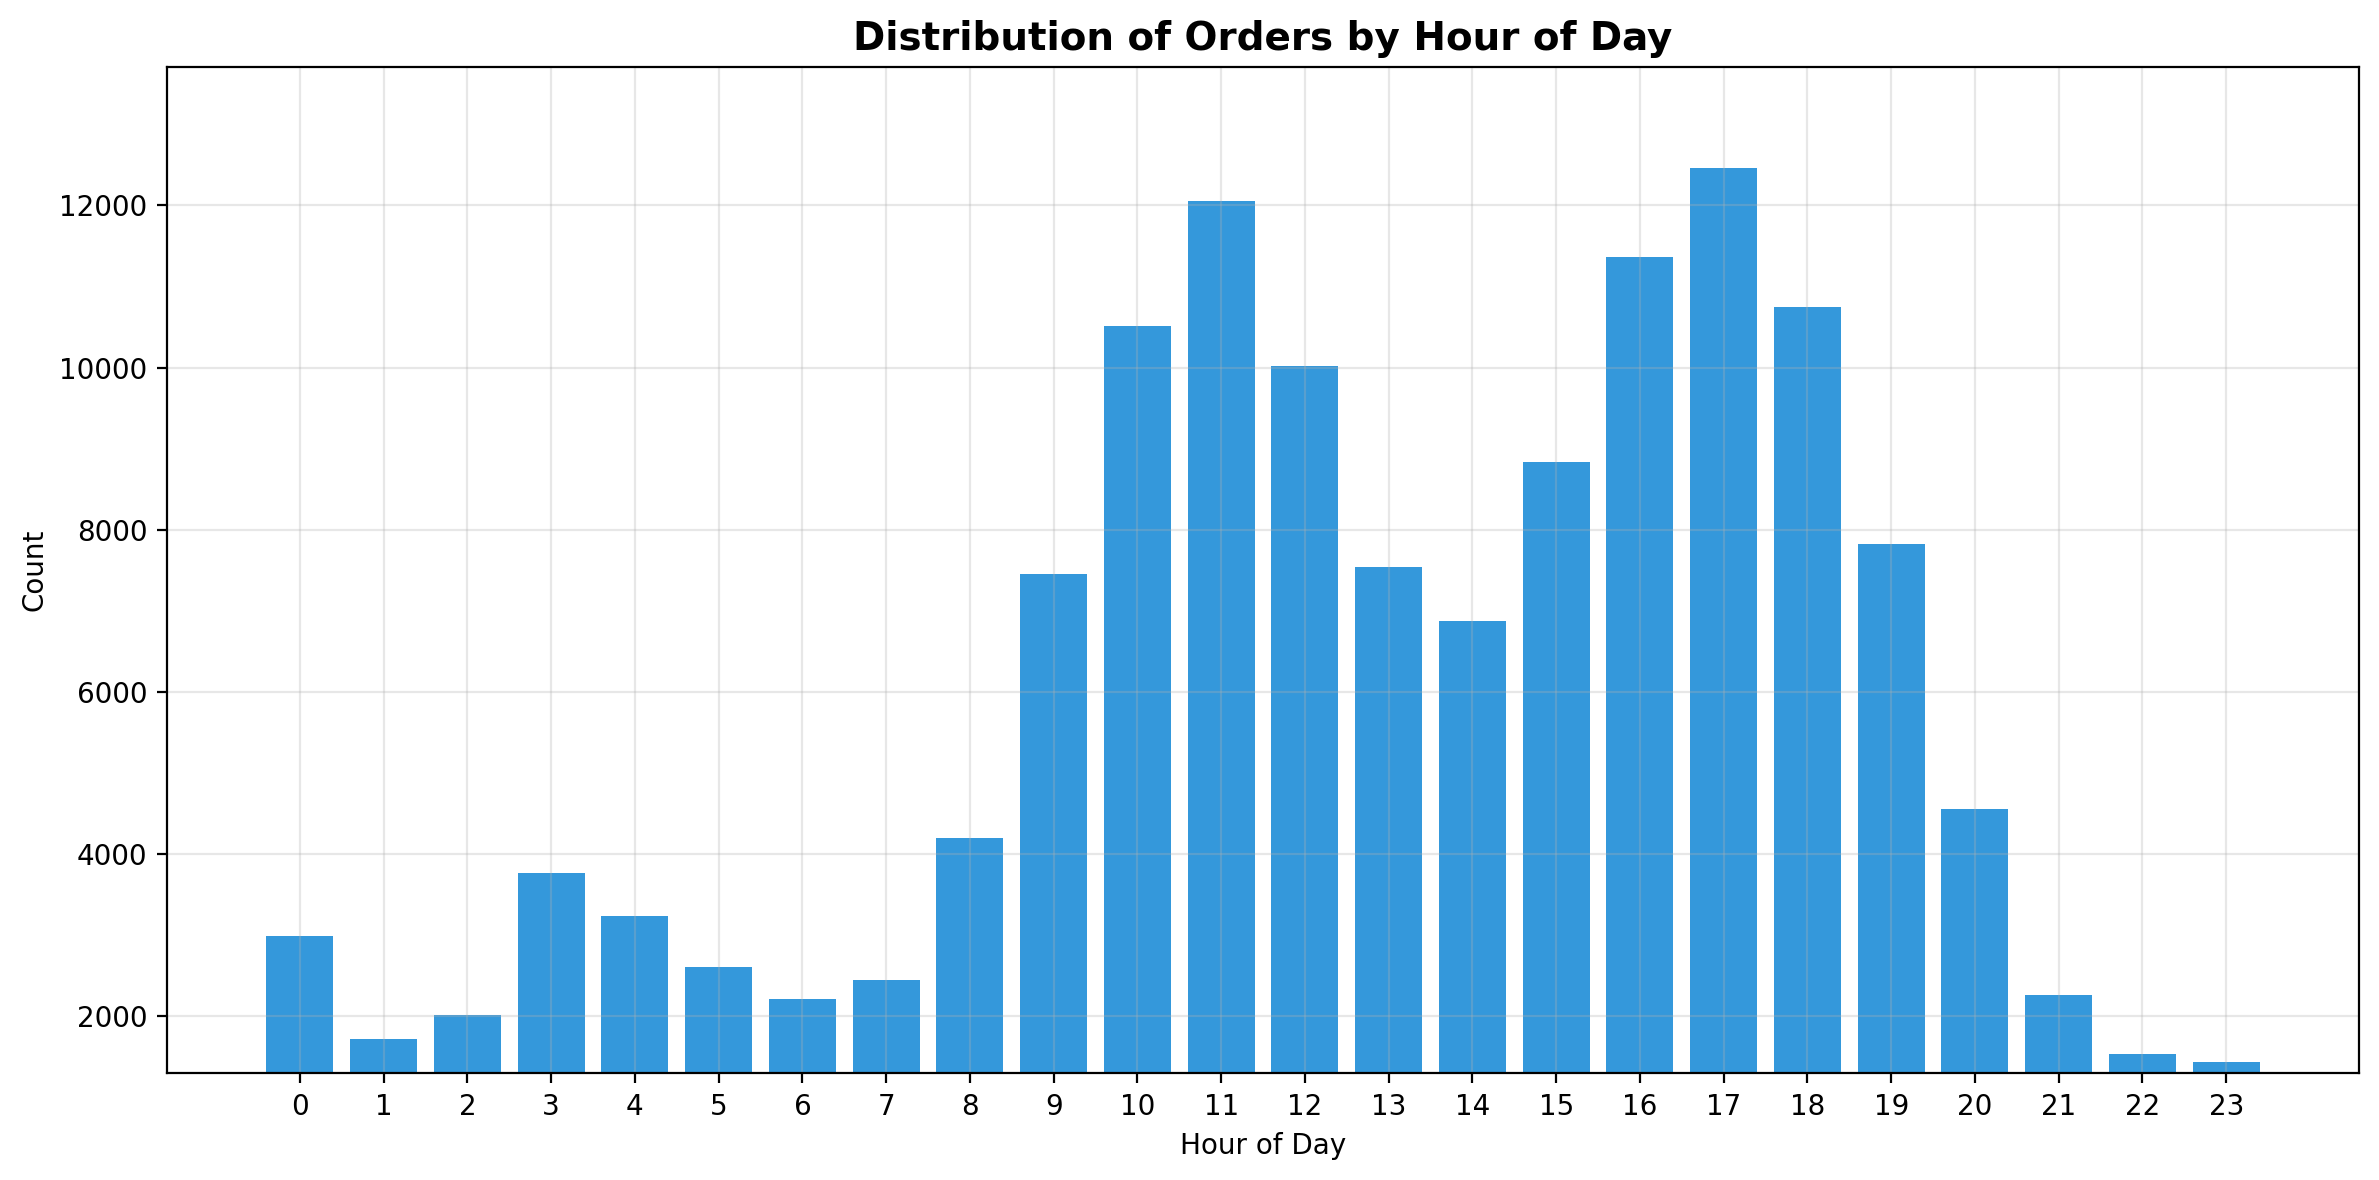

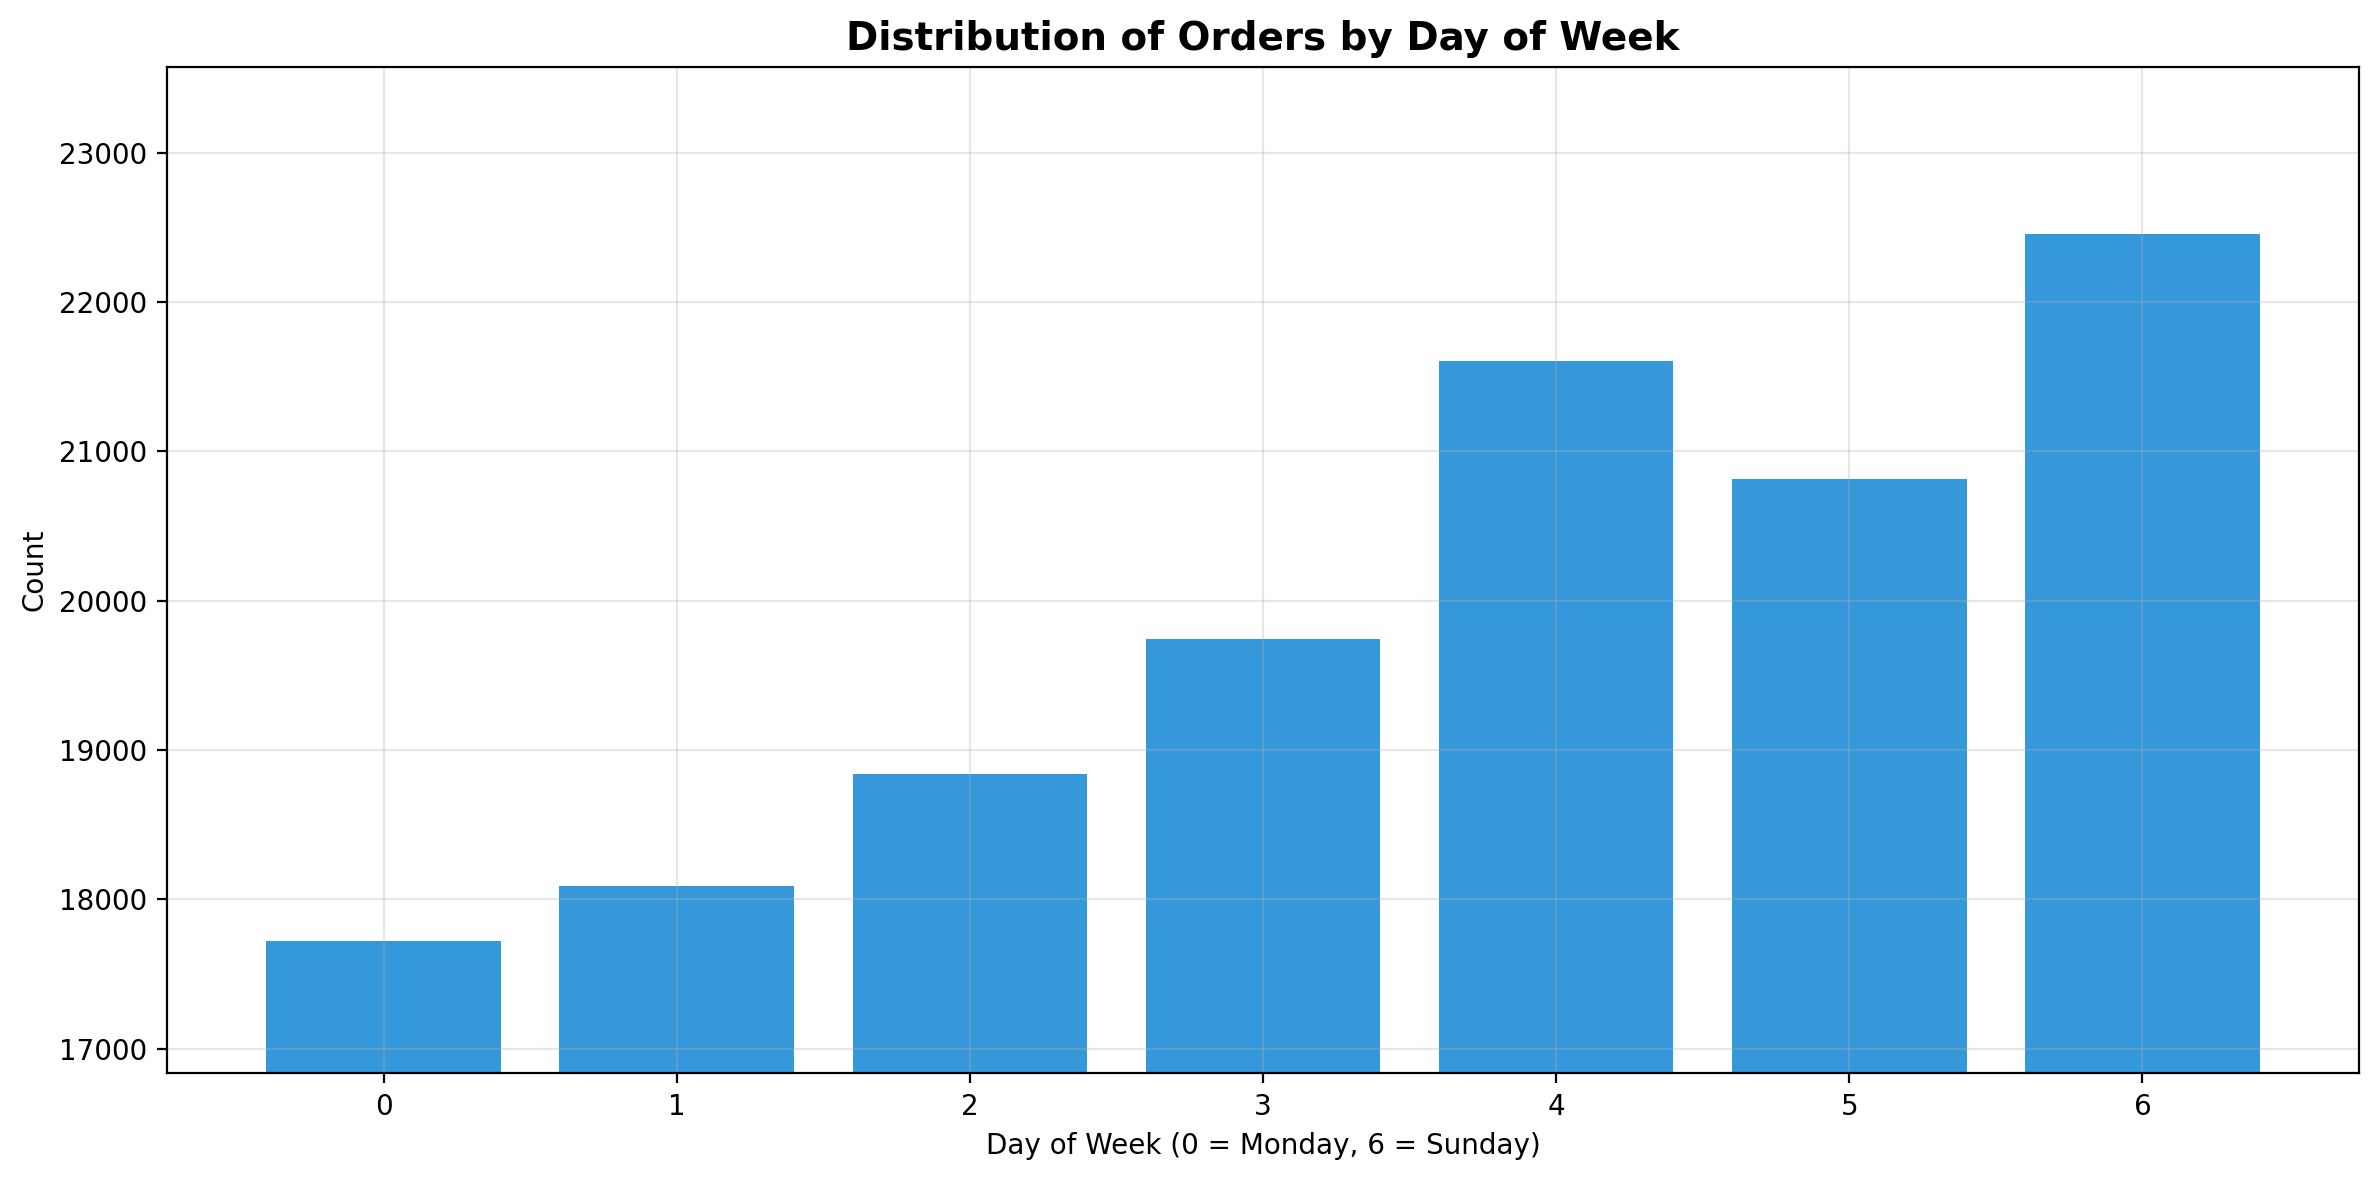

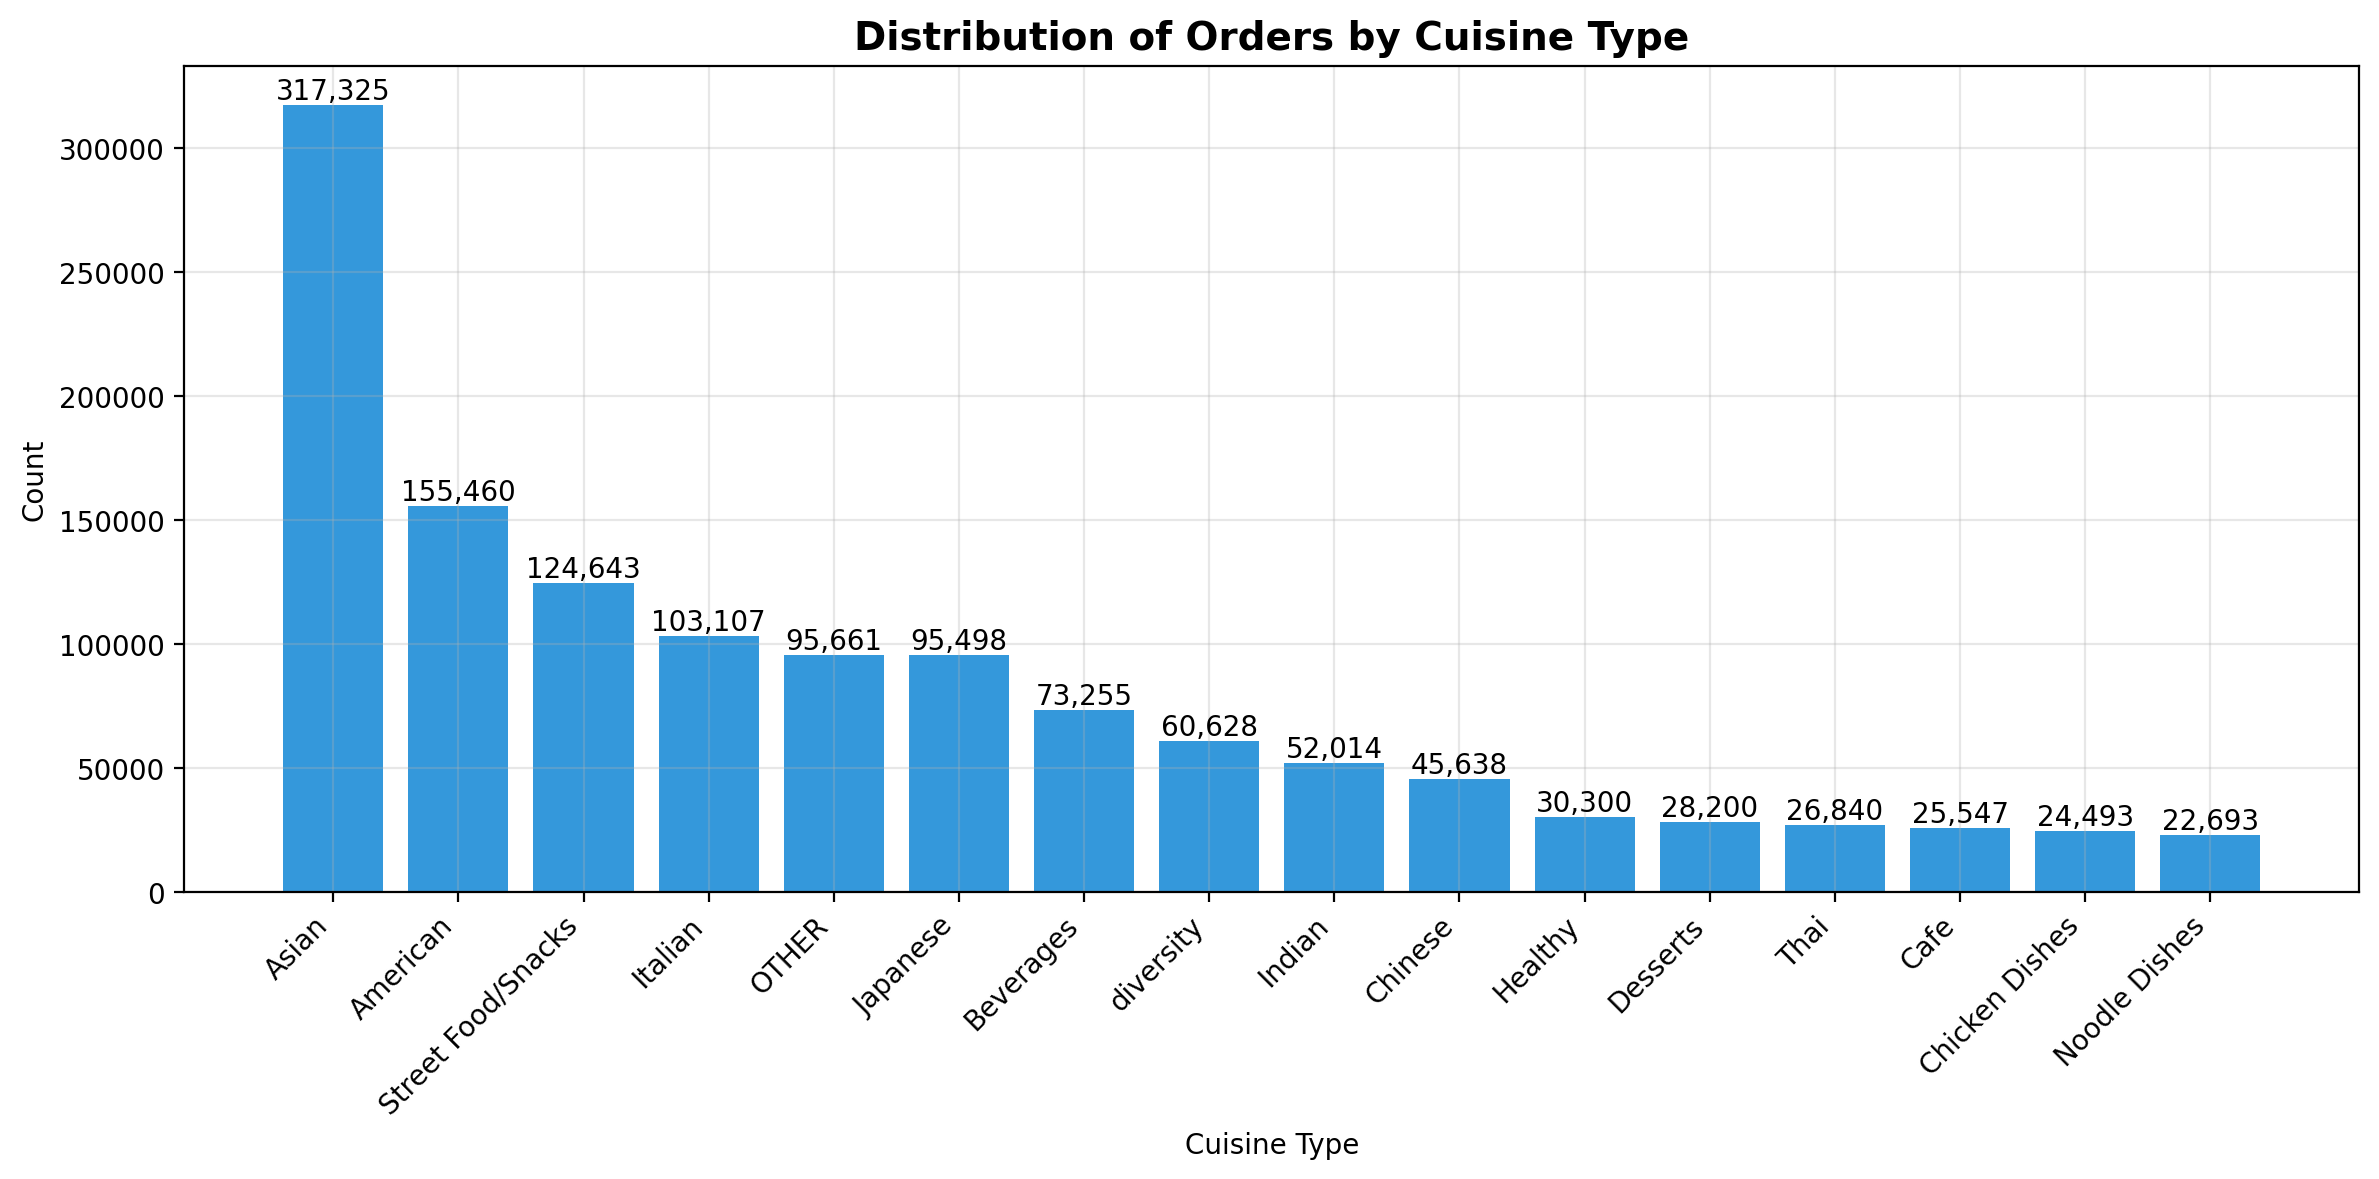

<Figure size 640x480 with 0 Axes>

In [103]:
def visualize_all_distributions(df):
    """
    Create all visualizations for the dataset with optimized scaling.
    """    # Time-based distributions
    hour_cols = [f'HR_{i}' for i in range(24)]
    if all(col in df.columns for col in hour_cols):
        plot_time_distribution(df, hour_cols, 'Distribution of Orders by Hour of Day', 'skyblue')

    day_cols = [f'DOW_{i}' for i in range(7)]
    if all(col in df.columns for col in day_cols):
        plot_time_distribution(df, day_cols, 'Distribution of Orders by Day of Week', 'skyblue')

    # Cuisine distribution
    cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
    if cuisine_cols:
        plot_cuisine_distribution(df, cuisine_cols,'Distribution of Orders by Cuisine Type')

visualize_all_distributions(df)

### BoxPlots

In [91]:
# Calculate the number of rows and columns for the subplots
n_vars = len(numeric_df.columns)
n_rows = (n_vars + 3) // 4  # 4 plots per row, rounded up
n_cols = min(n_vars, 4)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
fig.suptitle('Boxplots of Numeric Variables', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for each numeric variable
for i, column in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[column], ax=axes[i])
    axes[i].set_title(column, fontweight='bold')
    axes[i].set_xlabel('')

# Remove any unused subplots
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Pie Charts

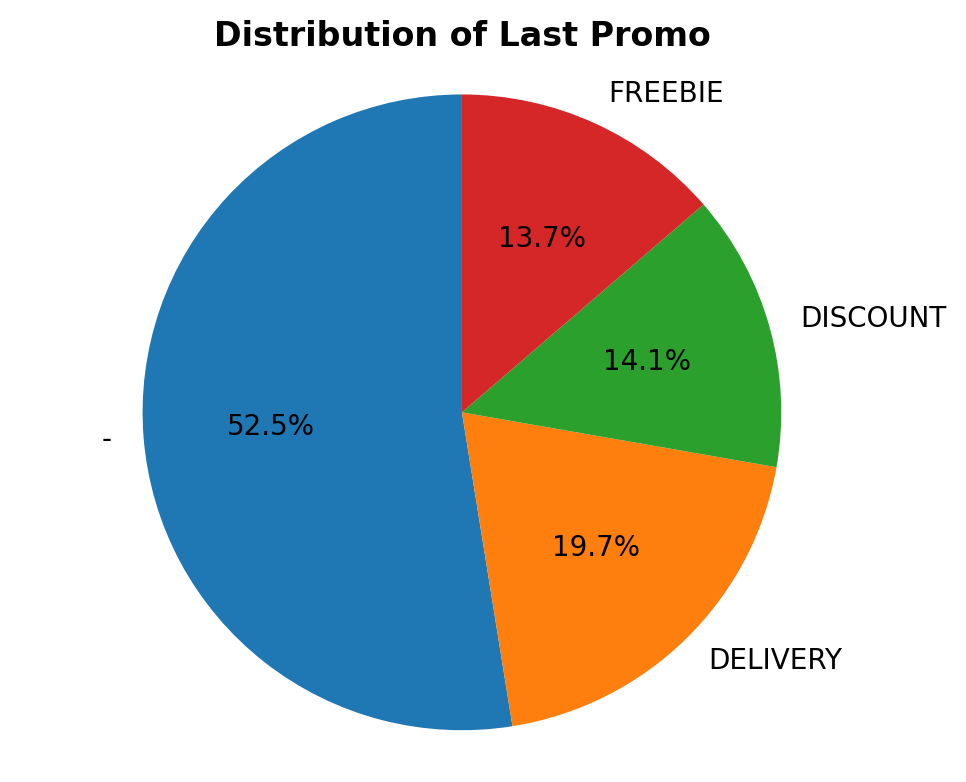

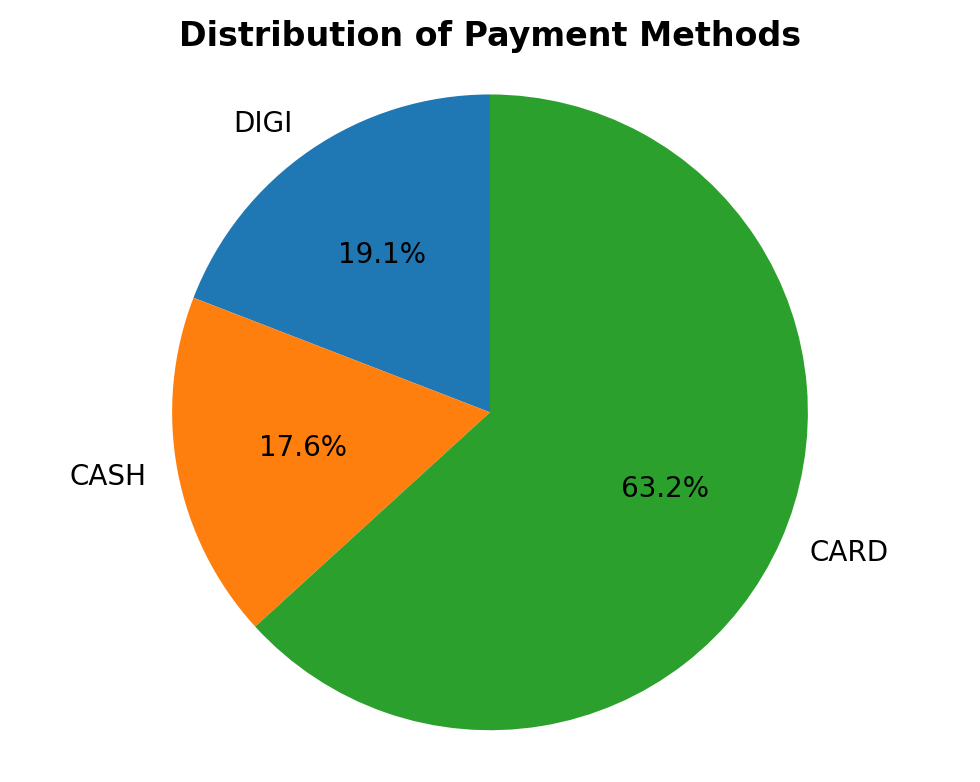

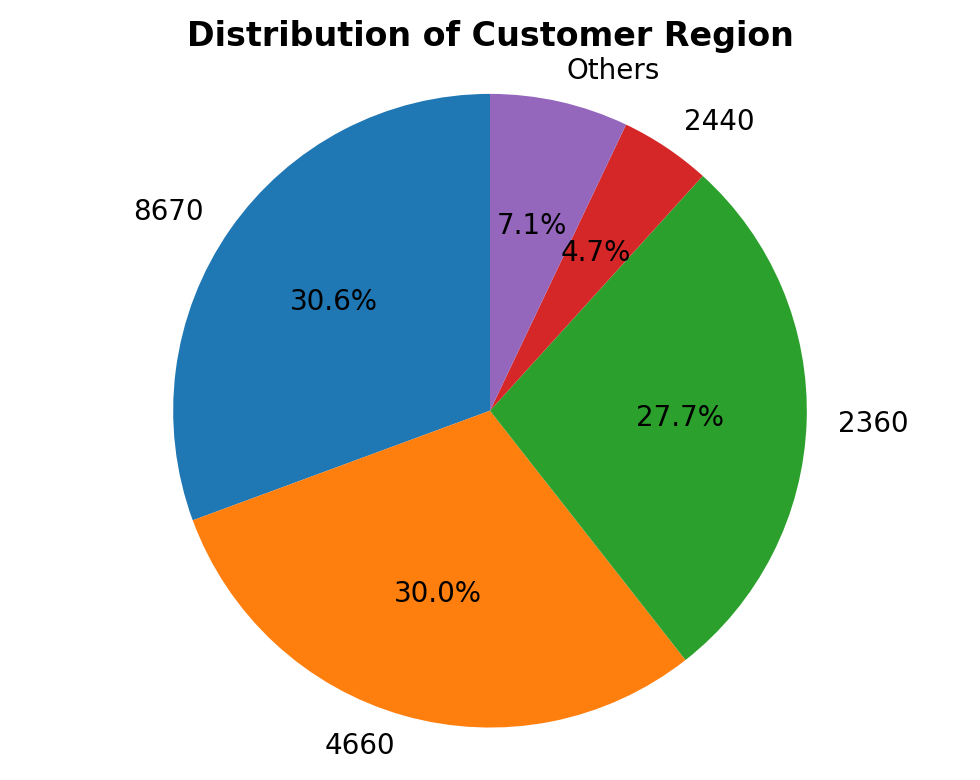

In [101]:
# Pie chart for last_promo
last_promo_counts = df['last_promo'].value_counts()
plt.figure(figsize=(5, 4))
plt.pie(last_promo_counts.values, labels=last_promo_counts.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Last Promo', fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Pie chart for payment method
payment_methods = ['DIGI', 'CASH', 'CARD']
payment_counts = [df[df['payment_method'] == method].shape[0] for method in payment_methods]

plt.figure(figsize=(5, 4))
plt.pie(payment_counts, labels=payment_methods, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Methods', fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

#Pie chart for customer_region
customer_region_counts = df['customer_region'].value_counts()
threshold = 0.04
others_value = customer_region_counts[customer_region_counts / sum(customer_region_counts) < threshold].sum()
customer_region_counts = customer_region_counts[customer_region_counts / sum(customer_region_counts) >= threshold]
customer_region_counts.loc['Others'] = others_value
plt.figure(figsize=(5, 4))
plt.pie(customer_region_counts.values, labels=customer_region_counts.index.astype(str), autopct=lambda p : '{:.1f}%'.format(p) if p >= 4 else ''
        , startangle=90)
plt.title('Distribution of Customer Region', fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Correlation Matrix

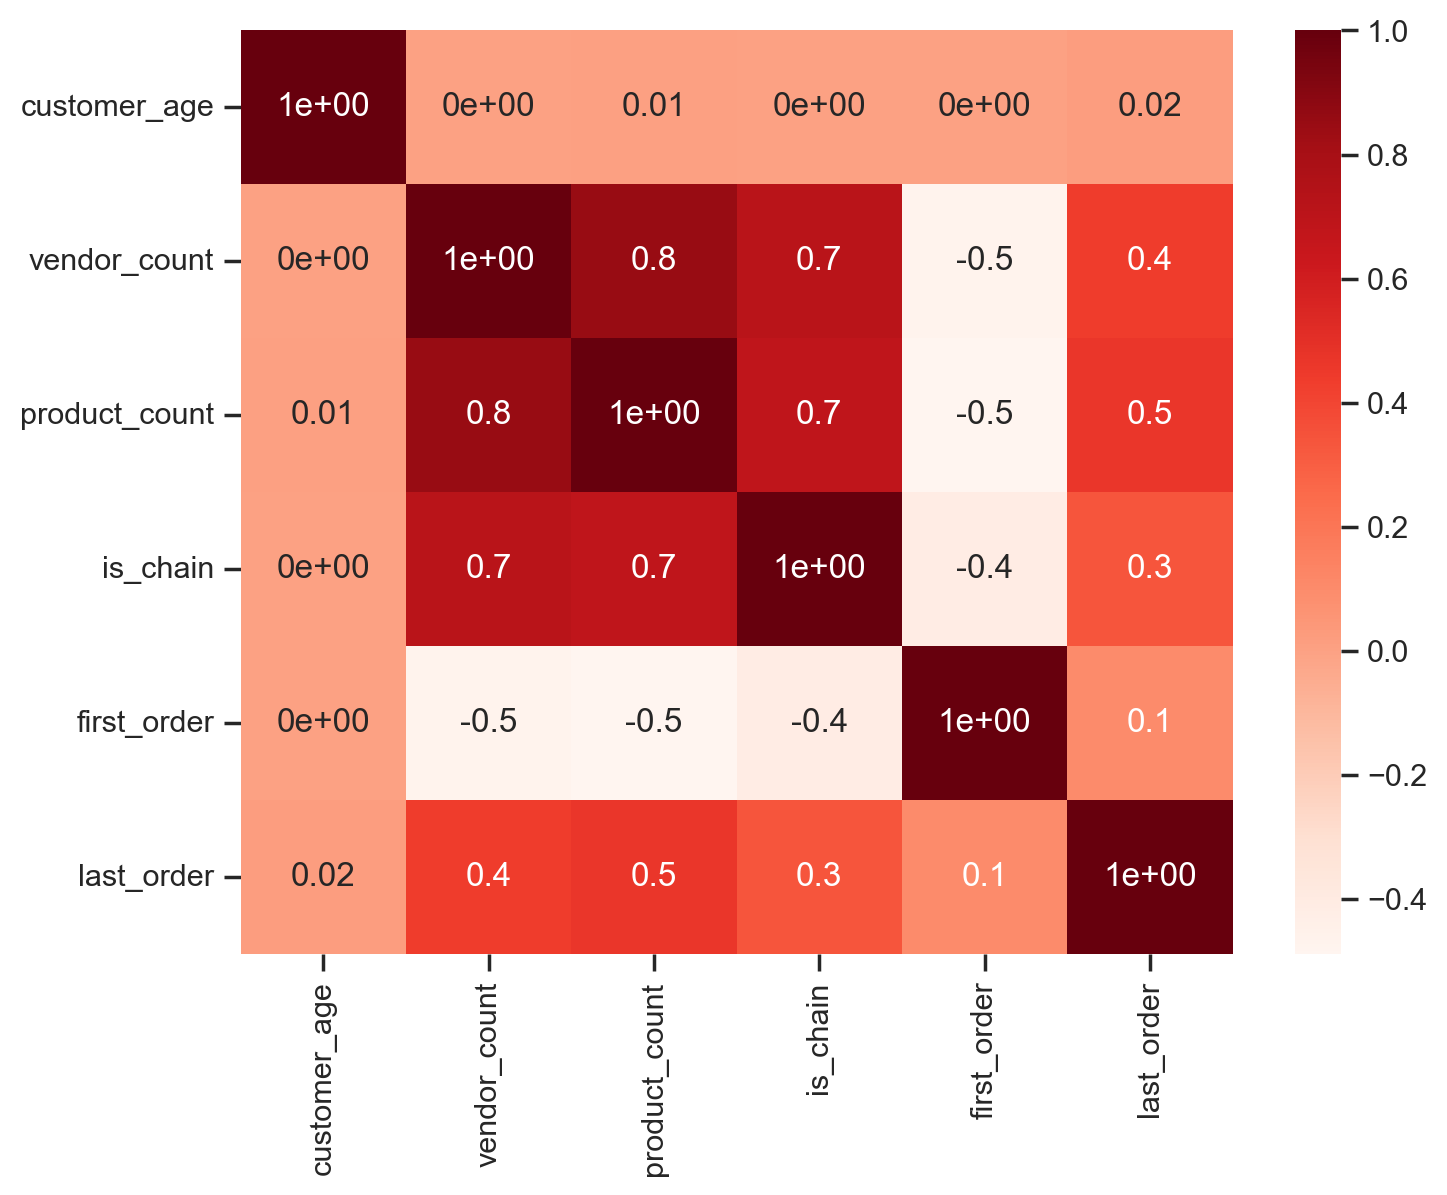

In [46]:
corr_metric = metric_variables.corr(method = 'spearman').round(2)
plt.figure(figsize=(8,6))
sns.heatmap(data = corr_metric, annot = True, cmap = plt.cm.Reds, fmt='.1')
plt.show() 

### Violin Plots

In [96]:
# Calculate the number of rows and columns for the subplots
n_vars = len(numeric_df.columns)
n_rows = (n_vars + 3) // 4  # 4 plots per row, rounded up
n_cols = min(n_vars, 4)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
fig.suptitle('Violin Plots of Numeric Variables', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a violin plot for each numeric variable
for i, column in enumerate(numeric_df.columns):
    sns.violinplot(y=numeric_df[column], ax=axes[i])
    axes[i].set_title(column, fontweight='bold')
    axes[i].set_xlabel('')

    # Rotate x-axis labels if they're too long
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Bivariate Analysis

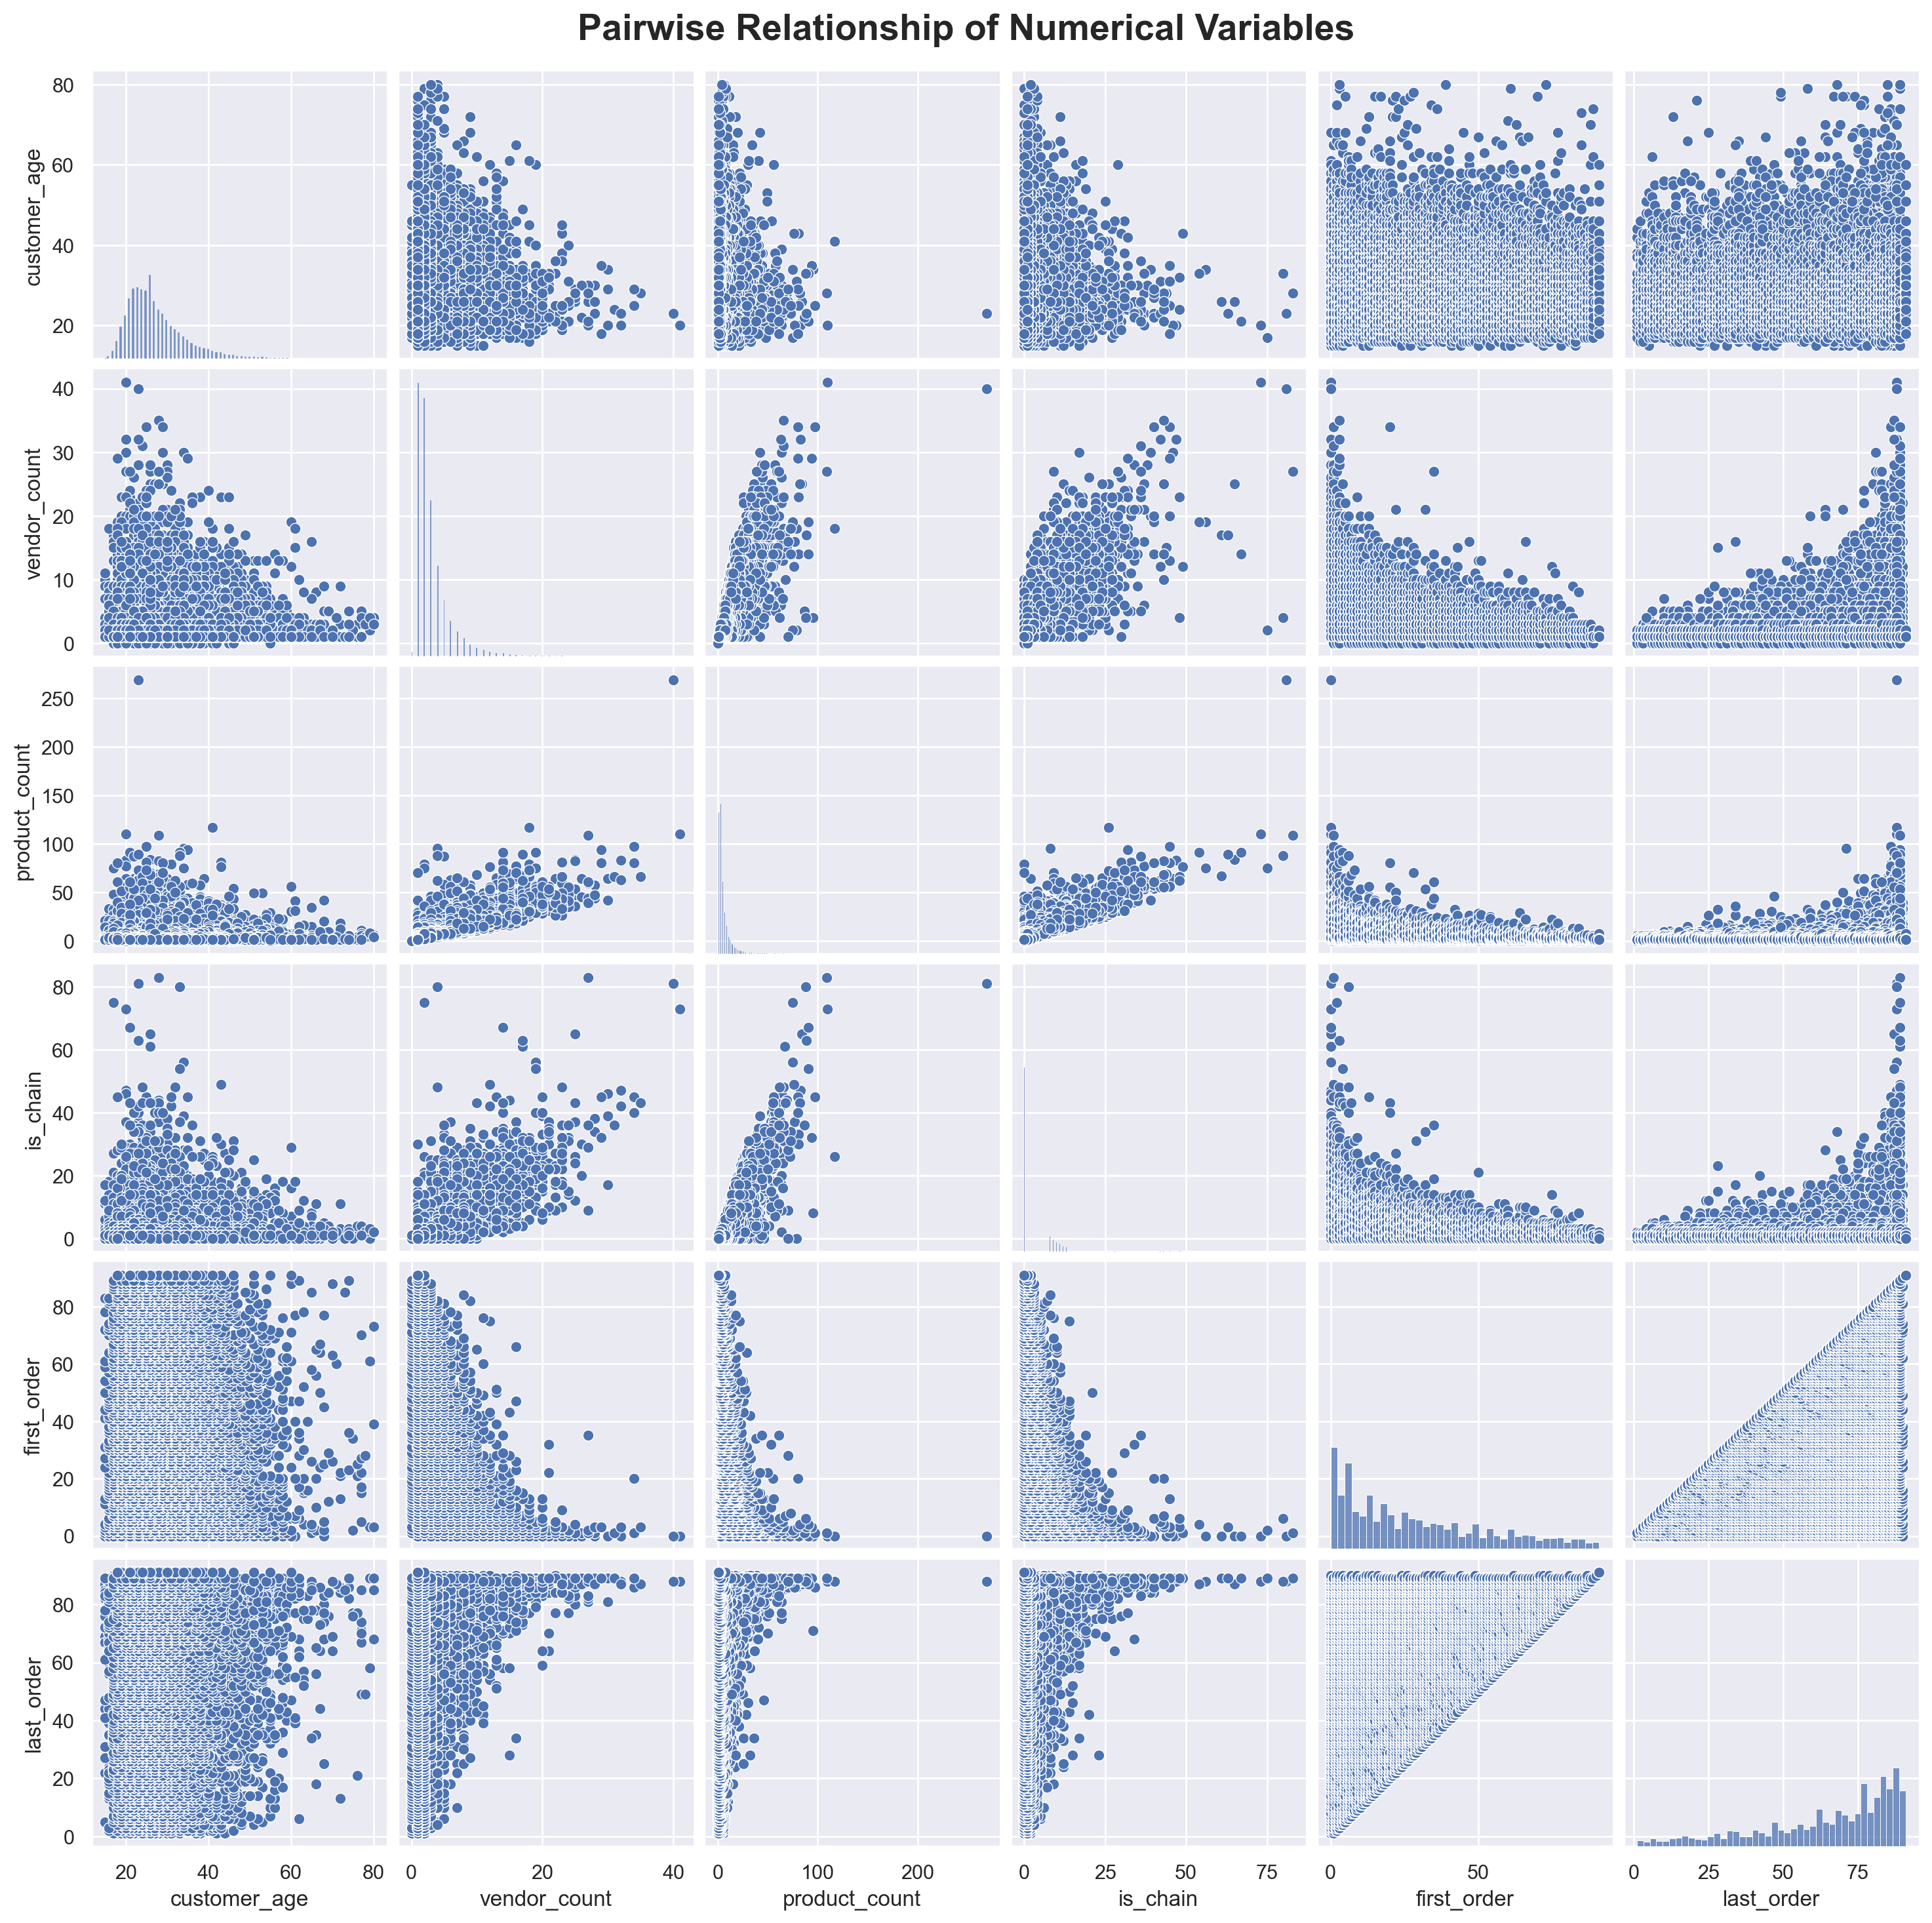

In [97]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(metric_variables, diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20, fontweight='bold')

# if the eda directory is not present then create it first
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))

plt.savefig(os.path.join('..', 'figures', 'eda', 'pairwise_numeric_scatterplots.png'), dpi=200)
plt.show()

<hr>
<a class="anchor" id="newfeature">
    
## 5.3 New Feature Creation
    
</a>

#### Total Orders Per Client

In [55]:
df['Total_Orders_Per_Client'] = Total_Orders_Week

#### Total Spent Per Client

In [56]:
df['mnt'] = cuisines.sum(axis=1)

#### Amount Spent Per Order

In [57]:
df['mnt_Per_Order'] = (df['mnt']/df['Total_Orders_Per_Client']).round(2)

#### Amount of Items Per Order

In [58]:
df['Items_Per_Order'] = (df['product_count']/df['Total_Orders_Per_Client'])

#### Frequency

In [59]:
df['last_order'].max()

91

In [60]:
#i think we cannot calculate it like this
df['frq'] = (df['Total_Orders_Per_Client']/(df['last_order']-df['first_order']+1))

#### Recency

In [61]:
#we use 91 as the day for today
today = 91
df['rcn'] = today - df['last_order']

#### Activity

In [62]:
df['activity'] = df['last_order'] - df['first_order'] + 1

#### Cuisine Diversity Index

In [63]:
df['CUI_diversity'] = cuisines.apply(lambda row: sum(row != 0), axis='columns')

#### Loyalty

In [64]:
# we callculate loyalty score to understand clients preferences for vendors
df['Loyalty'] = (df['Total_Orders_Per_Client']-df['vendor_count'])/df['Total_Orders_Per_Client']

#### Time Periods

In [65]:
    # Time periods (4 hours each)
    time_periods = {
        'Night': ['HR_0', 'HR_1', 'HR_2', 'HR_3'],         # 12-4am
        'Dawn': ['HR_4', 'HR_5', 'HR_6', 'HR_7'],          # 4-8am
        'Morning': ['HR_8', 'HR_9', 'HR_10', 'HR_11'],     # 8am-12pm
        'Afternoon': ['HR_12', 'HR_13', 'HR_14', 'HR_15'], # 12-4pm
        'Evening': ['HR_16', 'HR_17', 'HR_18', 'HR_19'],   # 4-8pm
        'Dusk': ['HR_20', 'HR_21', 'HR_22', 'HR_23']       # 8pm-12am
    }

#### Age Groups

In [66]:
# Age grouping
age_bins = [0, 17, 24, 34, 44, 54, 64, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['customer_age'], bins=age_bins, labels=age_labels)

#### CLV

In [67]:
    # CLV Score calculation
    recency_weight = 0.33
    frequency_weight = 0.33
    monetary_weight = 0.33

    # Normalize each component
    df['Recency_Score'] = 1 / (1 + df['rcn'])  # Higher score for more recent orders
    df['Frequency_Score'] = df['frq'] / df['frq'].max()
    df['Monetary_Score'] = df['mnt'] / df['mnt'].max()

    # Composite CLV score
    df['CLV_Score'] = (
        recency_weight * df['Recency_Score'] +
        frequency_weight * df['Frequency_Score'] +
        monetary_weight * df['Monetary_Score']
    )

<hr>
<a class="anchor" id="newfeature">
    
## 5.4 New Feature Analysis
    
</a>

In [68]:
new_variables = ['Loyalty', 'CUI_diversity', 'activity', 'rcn', 'frq', 'Items_Per_Order', 'Total_Orders_Per_Client', 'mnt_Per_Order', 'mnt']
df[new_variables].describe()

Loyalty  CUI_diversity      activity           rcn           frq  \
count  31737.000000   31875.000000  31875.000000  31875.000000  31875.000000   
mean       0.161804       1.902055     36.297129     27.025004      0.353150   
std        0.229567       1.439763     29.437410     22.988020      0.414448   
min        0.000000       0.000000      1.000000      0.000000      0.000000   
25%        0.000000       1.000000      4.000000      8.000000      0.076923   
50%        0.000000       2.000000     35.000000     20.000000      0.133333   
75%        0.333333       2.000000     63.000000     42.000000      0.600000   
max        0.973333      13.000000     91.000000     90.000000      4.000000   

       Items_Per_Order  Total_Orders_Per_Client  mnt_Per_Order           mnt  
count     31737.000000             31875.000000   31737.000000  31875.000000  
mean          1.298896                 4.369035       7.493558     28.340551  
std           0.418477                 5.084780       7.144018     36.955545  
min           0.000000                 0.000000       0.000000      0.000000  
25%           1.000000                 2.000000       3.190000      7.950000  
50%           1.166667                 3.000000       5.880000     18.050000  
75%           1.500000                 5.000000       9.530000     34.925000  
max           6.000000                94.000000     104.320000   1348.320000

### Histograms

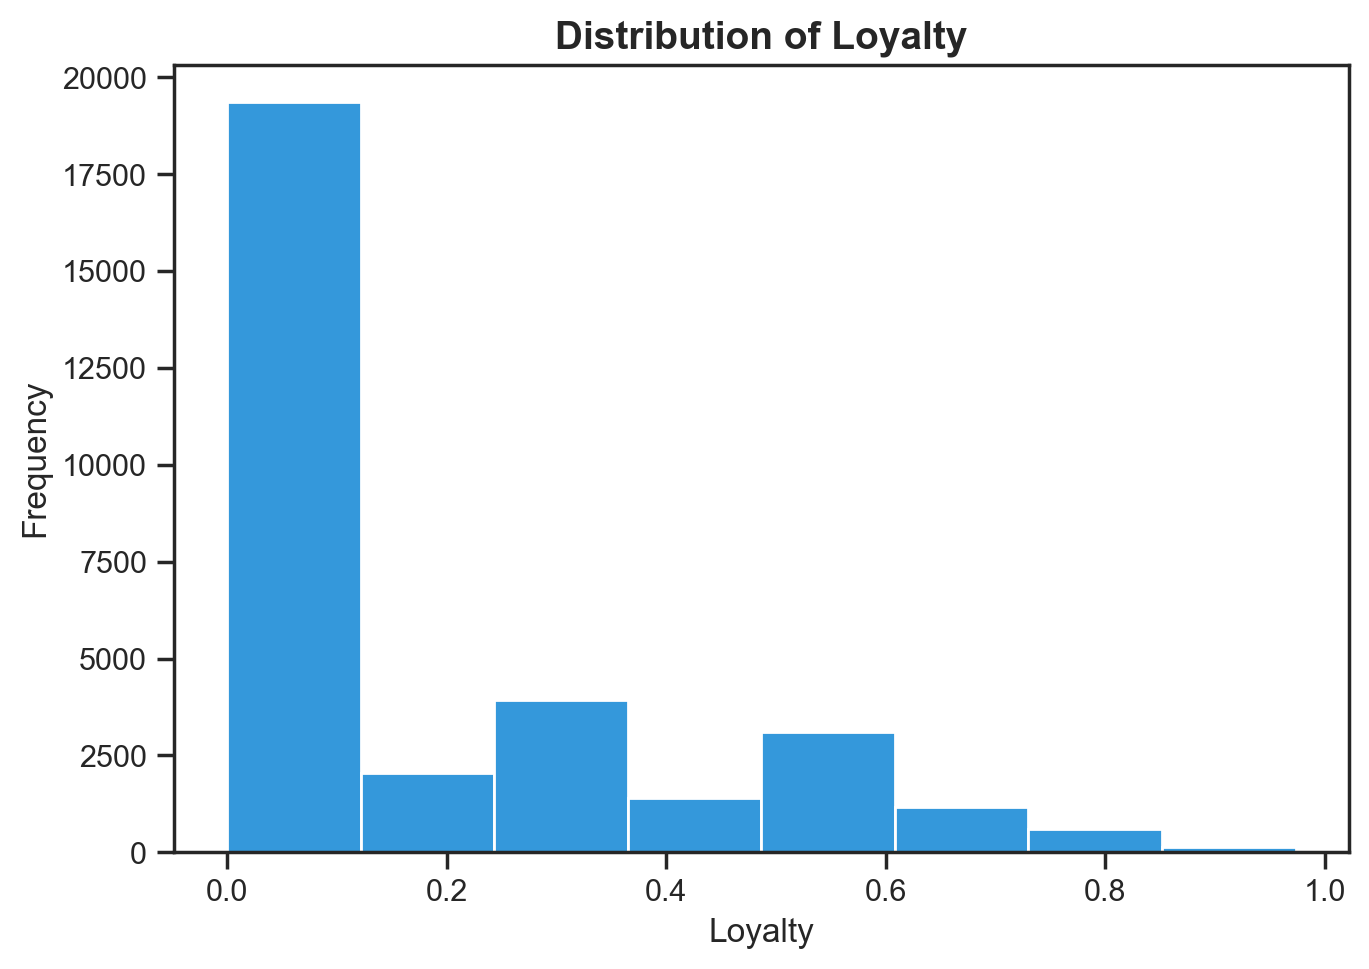

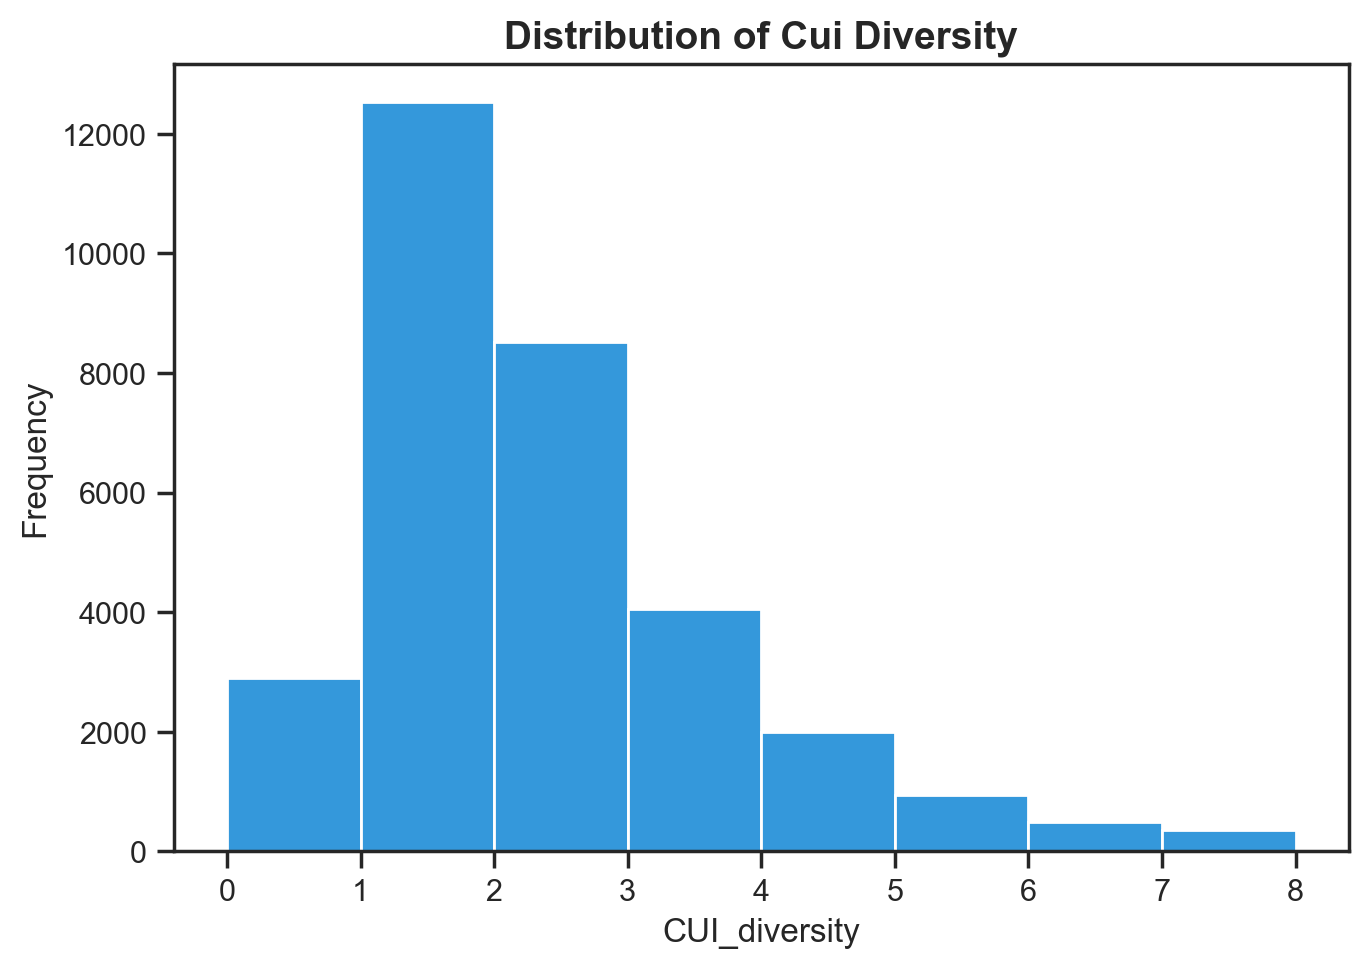

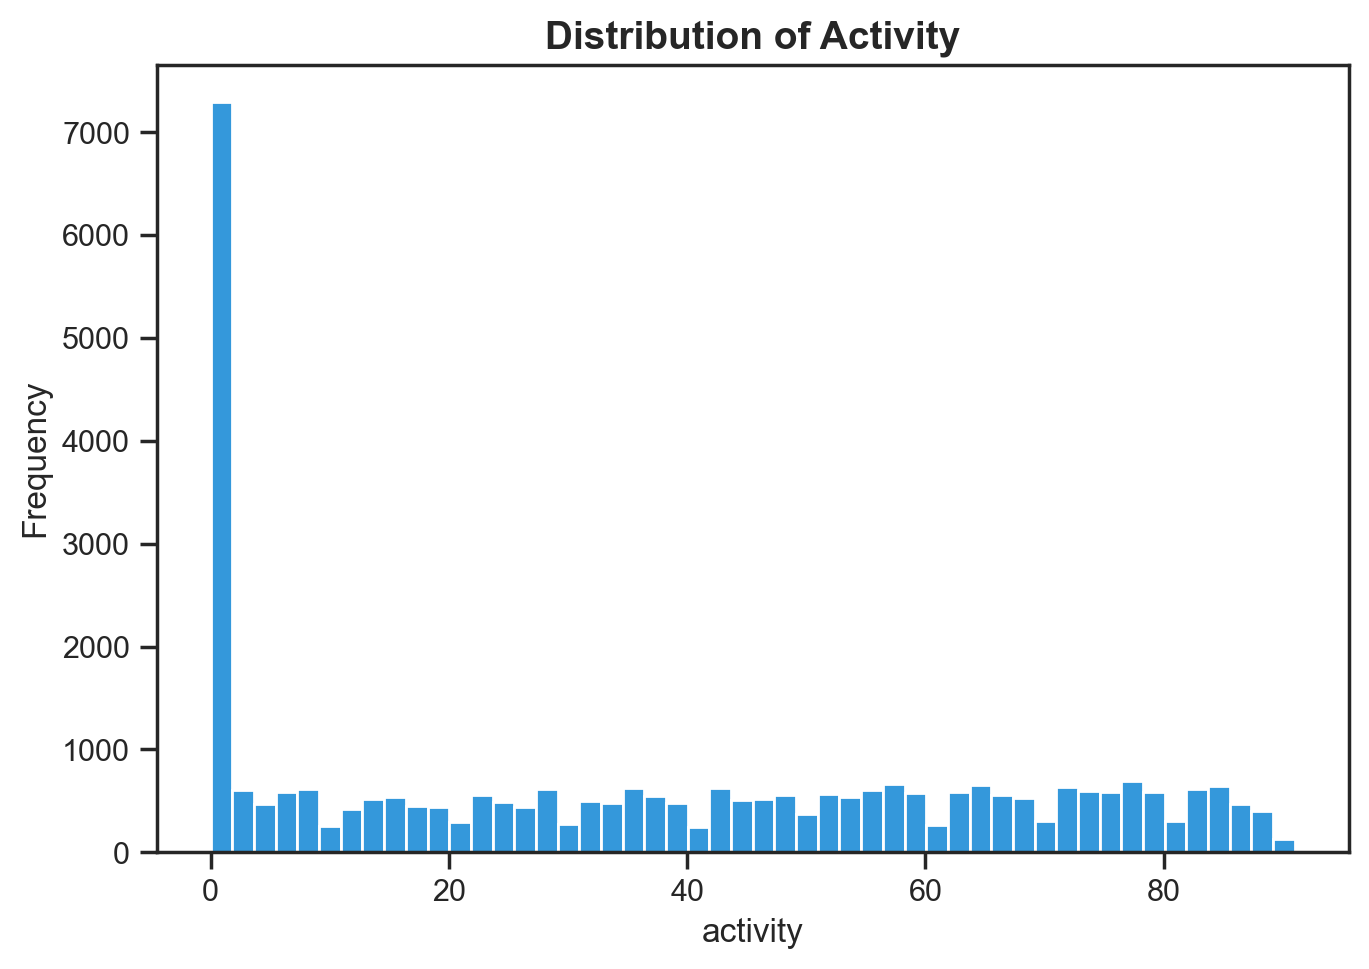

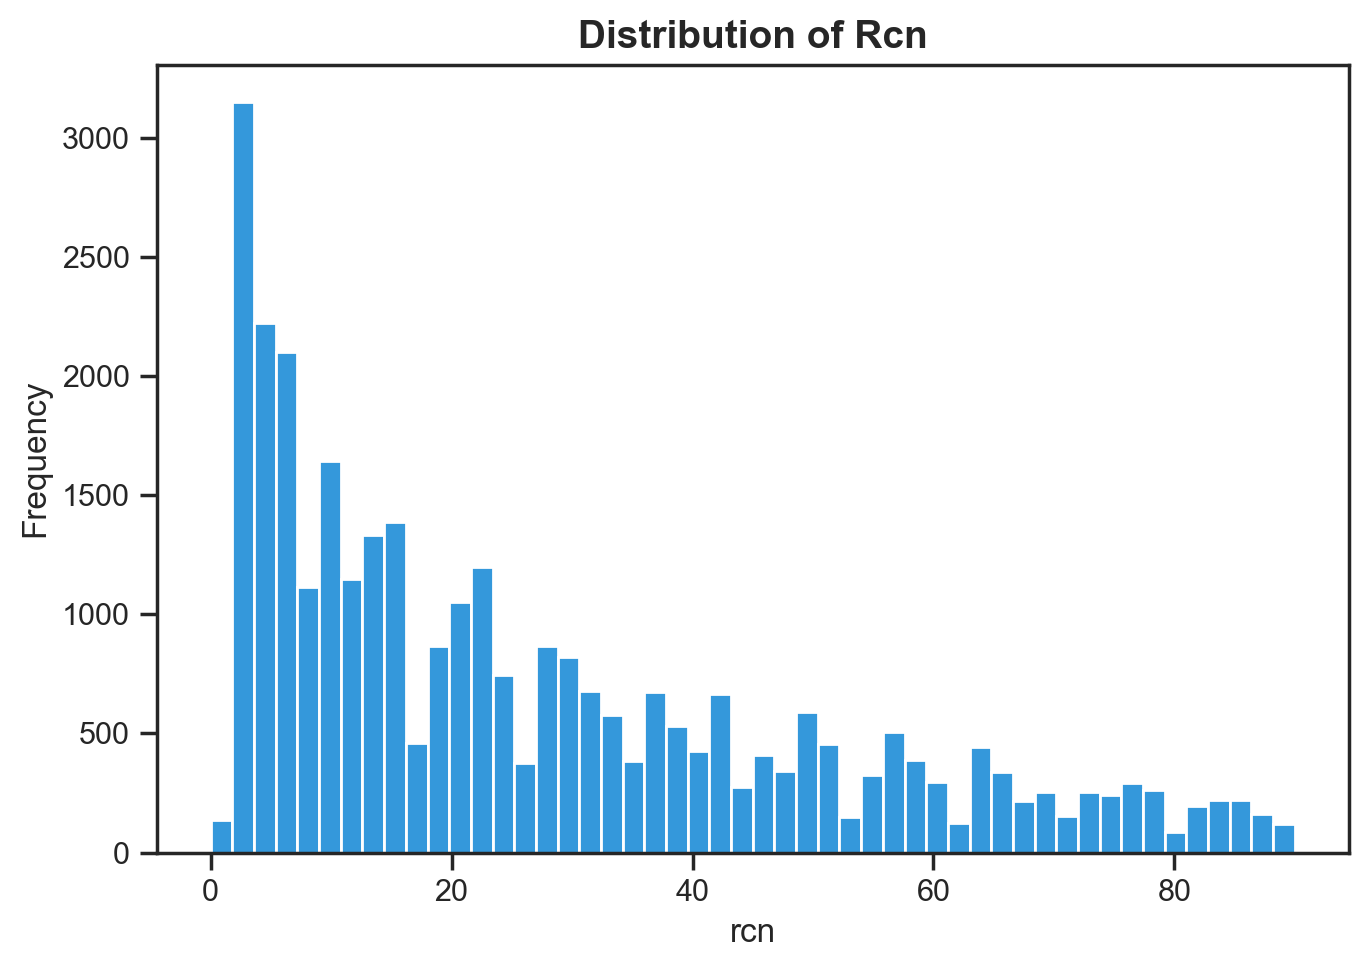

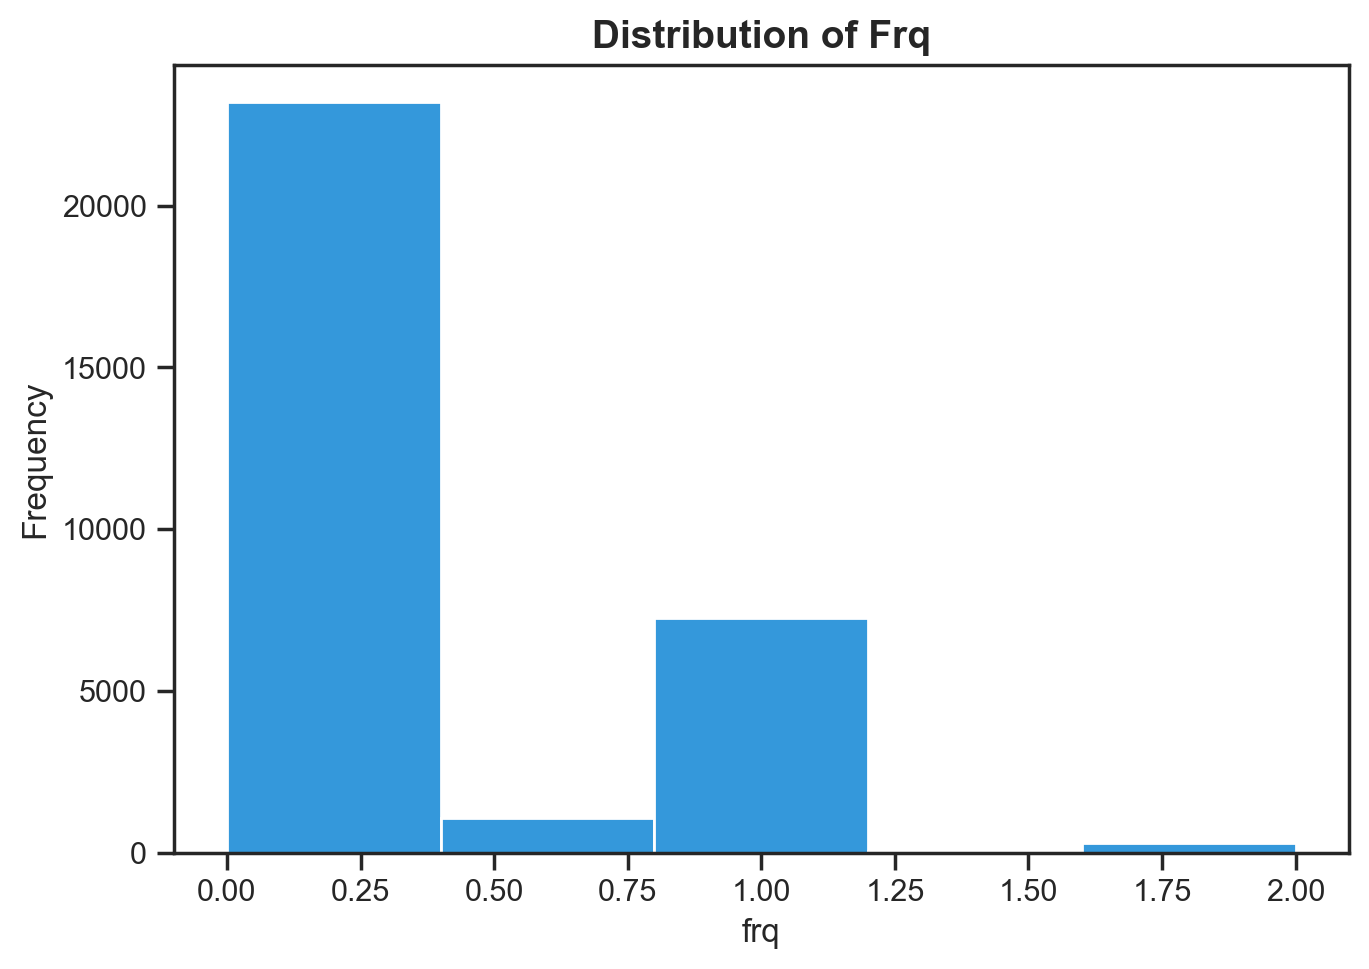

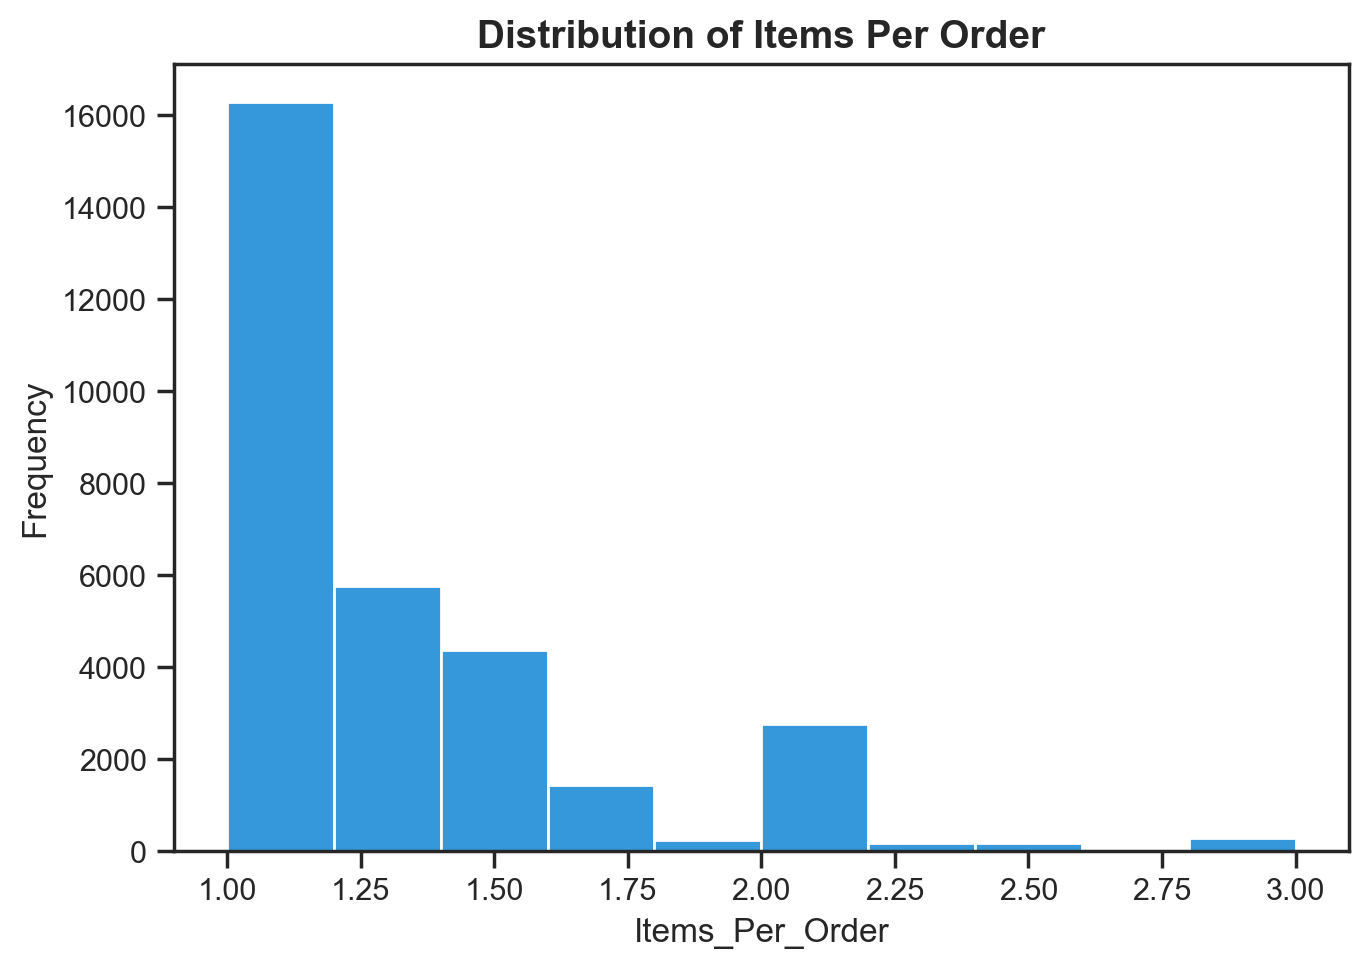

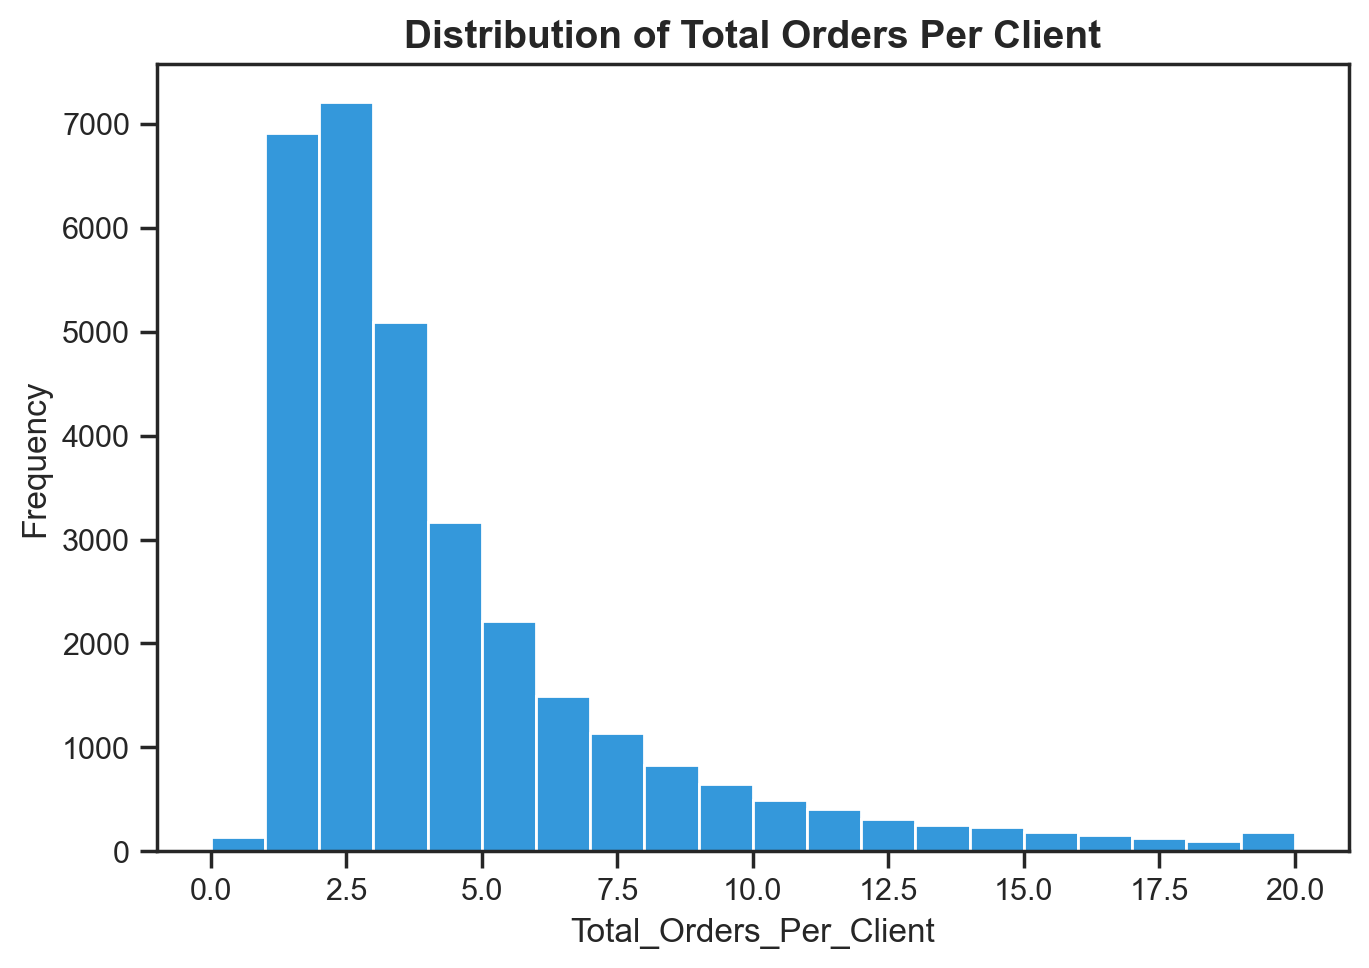

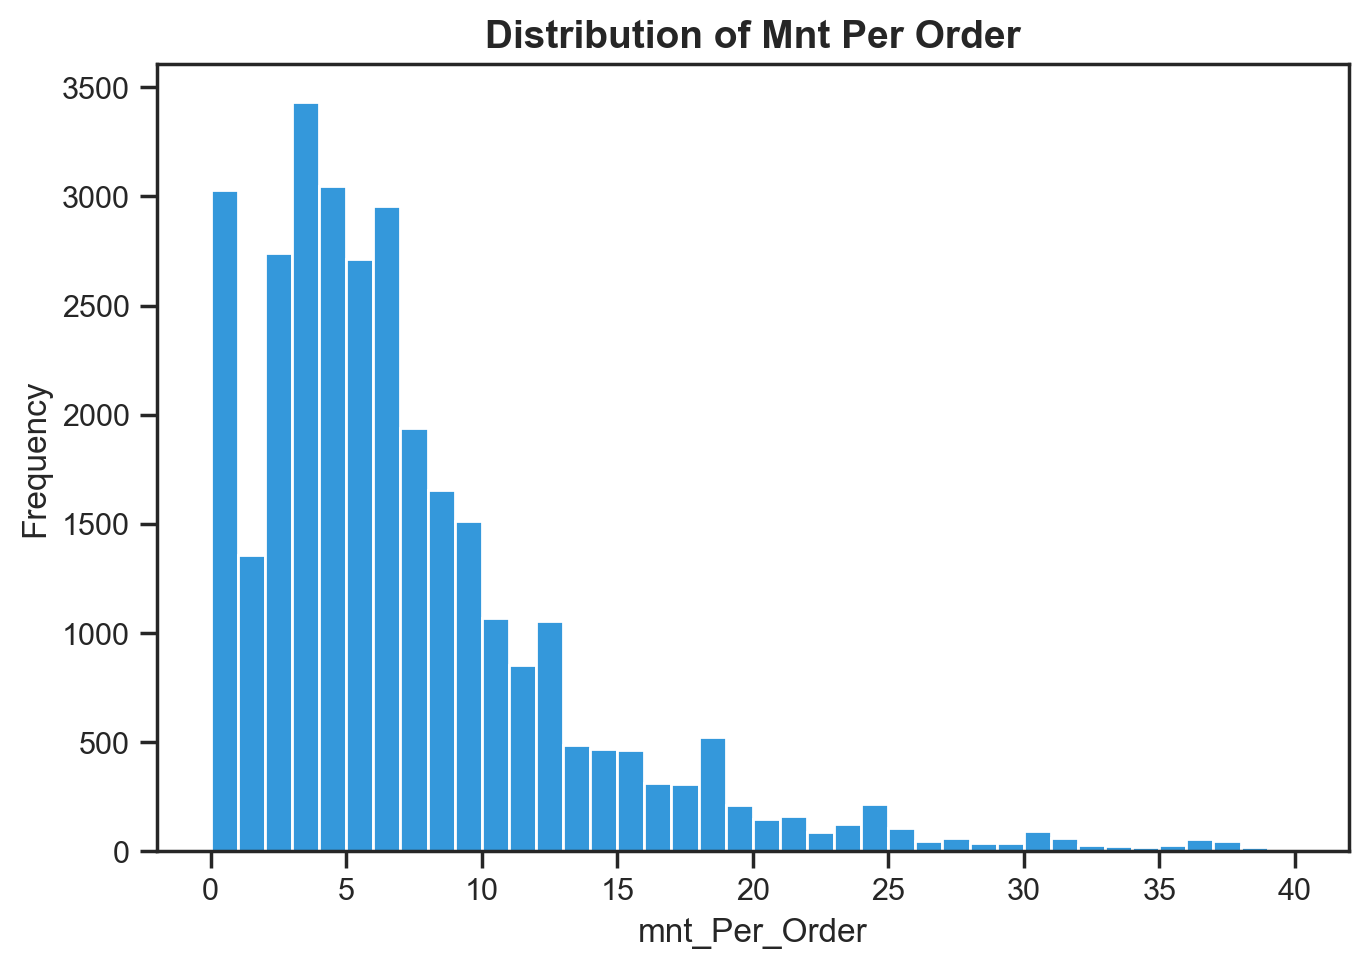

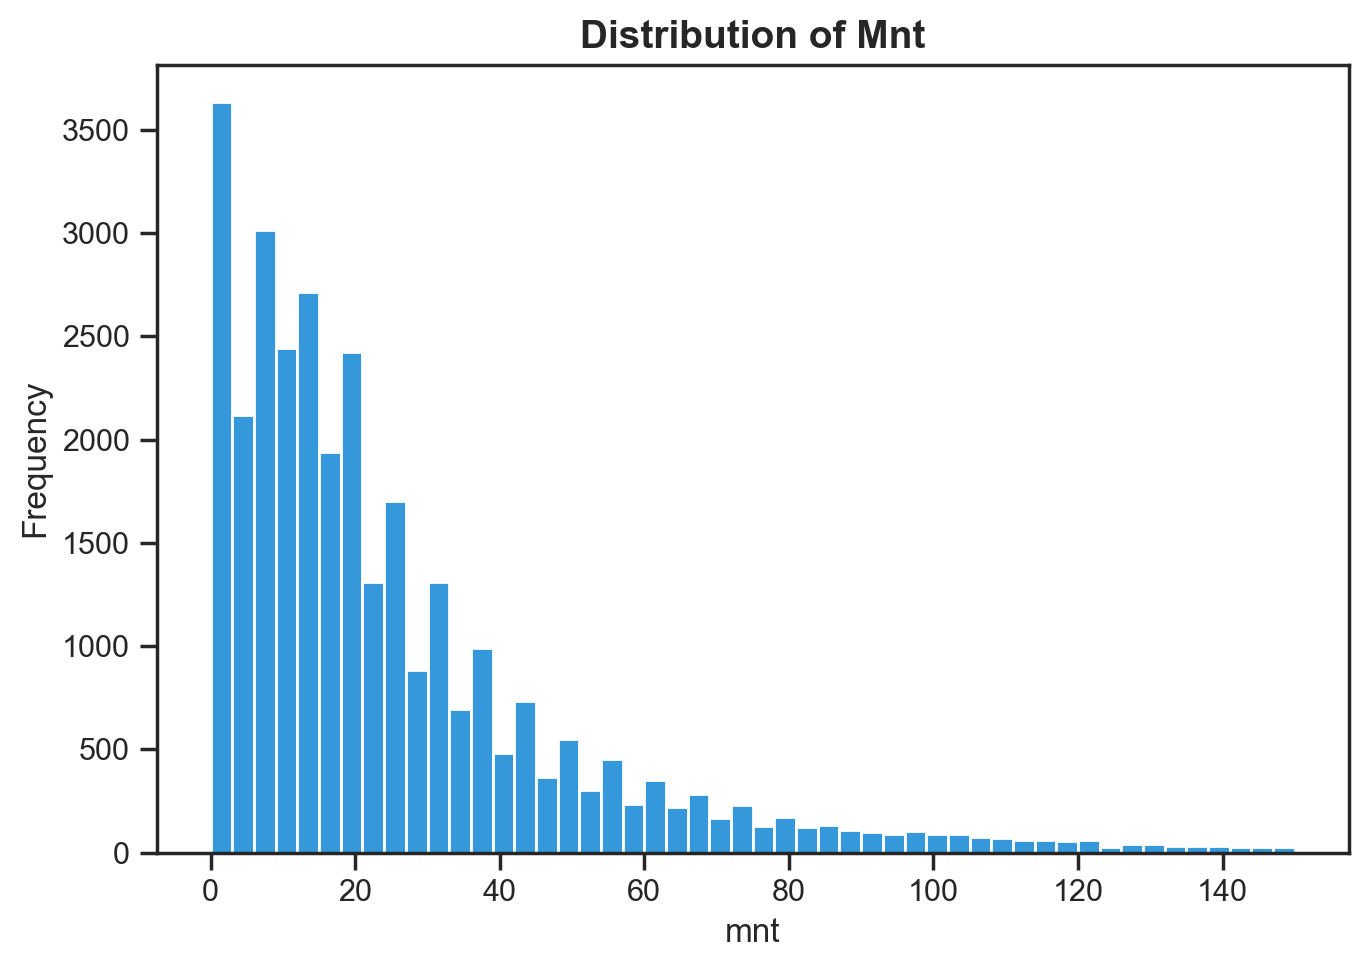

In [75]:
# Define the variables and their configurations
new_variables = ['Loyalty', 'CUI_diversity', 'activity', 'rcn', 'frq', 'Items_Per_Order', 'Total_Orders_Per_Client', 'mnt_Per_Order', 'mnt']

bin_config = {
    'Loyalty': 8,
    'CUI_diversity': 8,
    'activity': 50,
    'rcn': 50,
    'frq': 5,
    'Items_Per_Order': 10,
    'Total_Orders_Per_Client': 20,
    'mnt_Per_Order': 40,  # Added bin configuration for 'mnt_Per_Order'
    'mnt': 50  # Added bin configuration for 'mnt'
}

range_config = {
    'Loyalty': (0, df['Loyalty'].max()),
    'CUI_diversity': (0, 8),
    'activity': (0, df['activity'].max()),
    'rcn': (0, df['rcn'].max()),
    'frq':(0, 2),
    'Items_Per_Order': (1, 3),
    'Total_Orders_Per_Client': (0, 20),
    'mnt_Per_Order': (0, 40),  
    'mnt': (0, 150) 
}

# Set the style for Seaborn plots
sns.set_style('ticks')
for var in new_variables:
    title = f'Distribution of {var.replace("_", " ").title()}'
    bins = bin_config.get(var,50)
    range_tuple = range_config.get(var, (df[var].min(), df[var].max()))
    create_histogram(df[var], title, var, 'Frequency', bins = bins, range=range_tuple, color='#3498DB')

#### Correlations

In [70]:
def analyze_customer_behavior(df):
    """
    Analyze customer behavior patterns including CLV scoring, time-based ordering patterns,
    and loyalty scoring.
    Time is divided into six 4-hour periods.

    Parameters:
    df (pandas.DataFrame): DataFrame containing customer behavior data with columns:
        - recency: days since last order
        - frq: frequency of orders
        - mnt: monetary value
        - customer_age: age of customer
        - vendor_count: number of unique vendors used
        - HR_0 through HR_23: order counts for each hour

    Returns:
    pandas.DataFrame: Original dataframe with additional analysis columns
    """
    import pandas as pd

    # Calculate orders for each time period
    for period, hours in time_periods.items():
        df[f'Orders_{period}'] = df[hours].sum(axis=1)

    # Add peak ordering time
    order_cols = [f'Orders_{period}' for period in time_periods.keys()]
    df['Peak_Time'] = df[order_cols].idxmax(axis=1).str.replace('Orders_', '')

    return df

# Example usage:

df = analyze_customer_behavior(df)
result = df[[
    'CLV_Score',
    'Loyalty',
    'Age_Group',
    'Orders_Night',     # 12-4am
    'Orders_Dawn',      # 4-8am
    'Orders_Morning',   # 8am-12pm
    'Orders_Afternoon', # 12-4pm
    'Orders_Evening',   # 4-8pm
    'Orders_Dusk',      # 8pm-12am
    'Peak_Time'
]].head(5)

result


CLV_Score  Loyalty Age_Group  Orders_Night  Orders_Dawn  Orders_Morning  \
0   0.093195      0.0     18-24             0            0               0   
1   0.089264      0.0       <18             0            0               2   
2   0.088378      0.5     35-44             0            0               2   
3   0.063038      0.0     25-34             0            0               1   
4   0.062233      0.0     18-24             0            0               2   

   Orders_Afternoon  Orders_Evening  Orders_Dusk Peak_Time  
0                 0               2            0   Evening  
1                 0               0            0   Morning  
2                 0               0            0   Morning  
3                 1               0            0   Morning  
4                 0               0            0   Morning

In [71]:
result.describe()

CLV_Score   Loyalty  Orders_Night  Orders_Dawn  Orders_Morning  \
count   5.000000  5.000000           5.0          5.0        5.000000   
mean    0.079221  0.100000           0.0          0.0        1.400000   
std     0.015252  0.223607           0.0          0.0        0.894427   
min     0.062233  0.000000           0.0          0.0        0.000000   
25%     0.063038  0.000000           0.0          0.0        1.000000   
50%     0.088378  0.000000           0.0          0.0        2.000000   
75%     0.089264  0.000000           0.0          0.0        2.000000   
max     0.093195  0.500000           0.0          0.0        2.000000   

       Orders_Afternoon  Orders_Evening  Orders_Dusk  
count          5.000000        5.000000          5.0  
mean           0.200000        0.400000          0.0  
std            0.447214        0.894427          0.0  
min            0.000000        0.000000          0.0  
25%            0.000000        0.000000          0.0  
50%            0.000000        0.000000          0.0  
75%            0.000000        0.000000          0.0  
max            1.000000        2.000000          0.0

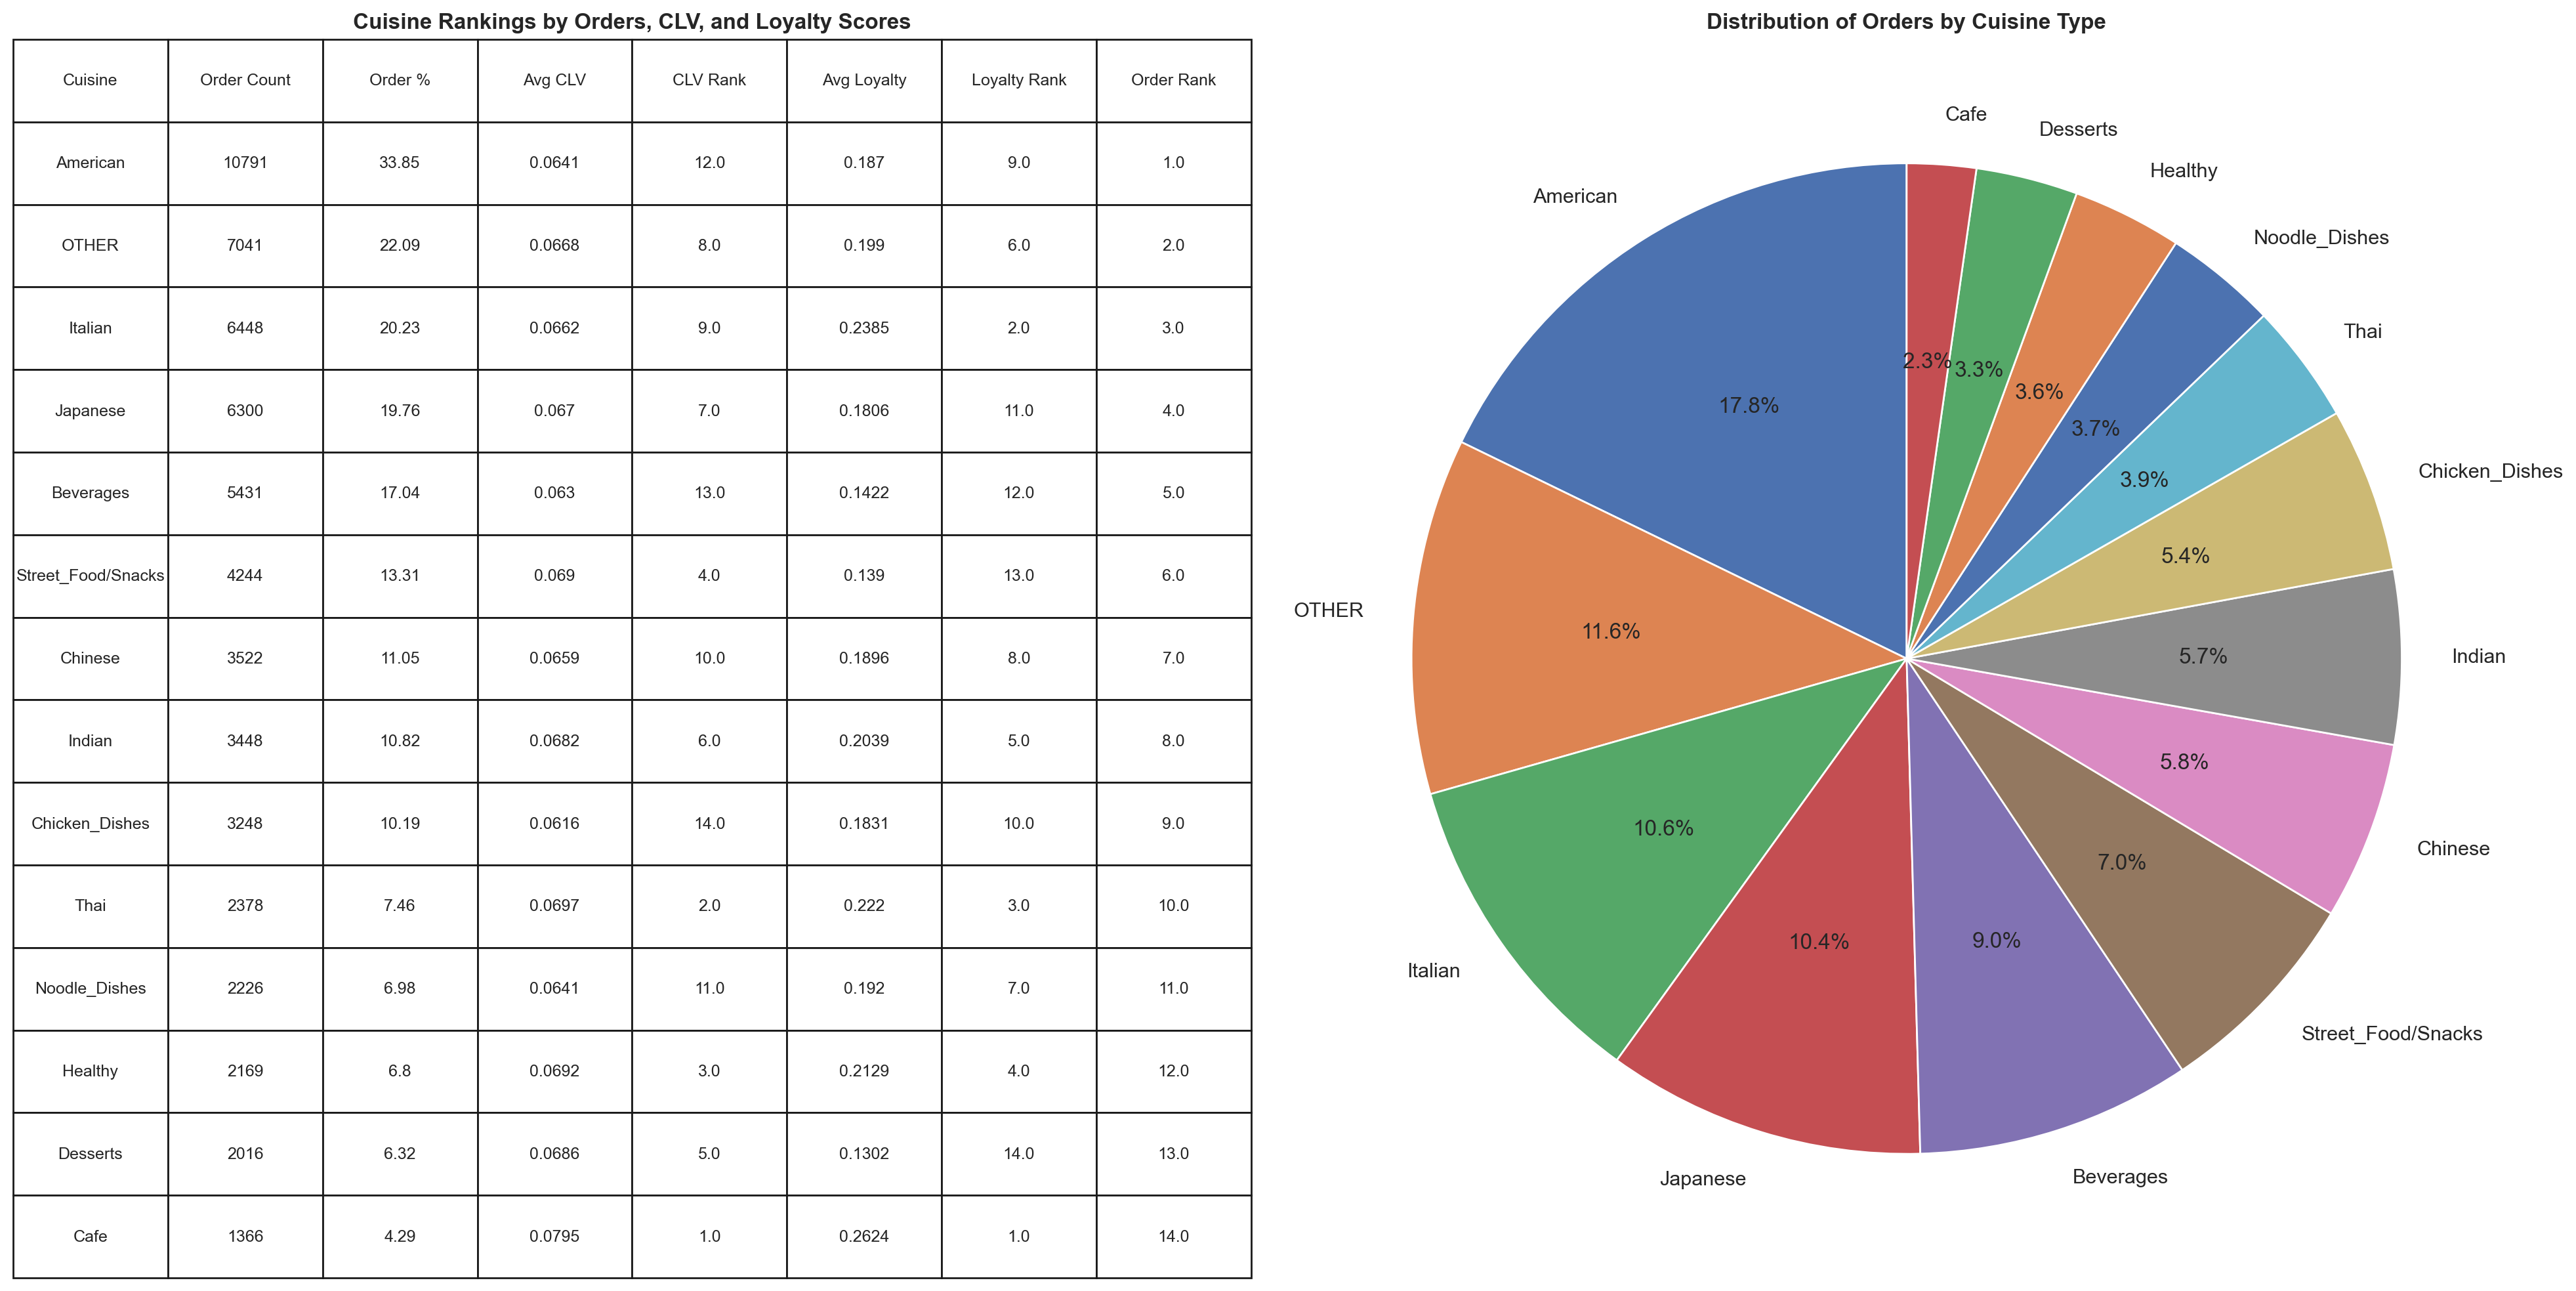


Correlations between metrics:
             Order %  Avg CLV  Avg Loyalty
Order %       1.0000  -0.4446      -0.1235
Avg CLV      -0.4446   1.0000       0.5040
Avg Loyalty  -0.1235   0.5040       1.0000

Detailed Rankings:
           Cuisine  Order Count  Order %  Avg CLV  CLV Rank  Avg Loyalty  Loyalty Rank  Order Rank
          American        10791    33.85   0.0641      12.0       0.1870           9.0         1.0
             OTHER         7041    22.09   0.0668       8.0       0.1990           6.0         2.0
           Italian         6448    20.23   0.0662       9.0       0.2385           2.0         3.0
          Japanese         6300    19.76   0.0670       7.0       0.1806          11.0         4.0
         Beverages         5431    17.04   0.0630      13.0       0.1422          12.0         5.0
Street_Food/Snacks         4244    13.31   0.0690       4.0       0.1390          13.0         6.0
           Chinese         3522    11.05   0.0659      10.0       0.1896           8

In [98]:
def analyze_cuisine_performance(df):
    """
    Analyze and visualize CLV, Loyalty scores, and order distribution across different cuisines.
    """
    # Calculate total orders across all cuisines
    total_orders = df['Total_Orders_Per_Client'].sum()

    # Initialize lists to store results
    results = []

    # Calculate metrics for each cuisine
    for cuisine in cuisines.columns:
        # Filter for orders that include this cuisine
        cuisine_orders = df[df[cuisine] > 0]

        if len(cuisine_orders) > 0:
            avg_clv = cuisine_orders['CLV_Score'].mean()
            avg_loyalty = cuisine_orders['Loyalty'].mean()
            order_count = len(cuisine_orders)
            order_percentage = (order_count / len(df)) * 100

            results.append({
                'Cuisine': cuisine.replace('CUI_', ''),
                'Order Count': order_count,
                'Order %': order_percentage,
                'Avg CLV': avg_clv,
                'CLV Rank': 0,  # Will be filled later
                'Avg Loyalty': avg_loyalty,
                'Loyalty Rank': 0,  # Will be filled later
            })

    # Convert to DataFrame
    rankings_df = pd.DataFrame(results)

    # Add rankings
    rankings_df['CLV Rank'] = rankings_df['Avg CLV'].rank(ascending=False)
    rankings_df['Loyalty Rank'] = rankings_df['Avg Loyalty'].rank(ascending=False)
    rankings_df['Order Rank'] = rankings_df['Order %'].rank(ascending=False)

    # Sort by Order Percentage
    rankings_df = rankings_df.sort_values('Order %', ascending=False)

    # Round numerical columns
    rankings_df['Avg CLV'] = rankings_df['Avg CLV'].round(4)
    rankings_df['Avg Loyalty'] = rankings_df['Avg Loyalty'].round(4)
    rankings_df['Order %'] = rankings_df['Order %'].round(2)

    # Create visualization
    fig = plt.figure(figsize=(20, 10))

    # Create main rankings table
    ax1 = plt.subplot(1, 2, 1)
    table = plt.table(cellText=rankings_df.values,
                     colLabels=rankings_df.columns,
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1])

    # Adjust table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    for cell in table._cells:
        table._cells[cell].set_height(0.08)

    plt.axis('off')
    plt.title('Cuisine Rankings by Orders, CLV, and Loyalty Scores', fontweight='bold')

    # Create order distribution pie chart
    ax2 = plt.subplot(1, 2, 2)
    plt.pie(rankings_df['Order %'],
            labels=rankings_df['Cuisine'],
            autopct='%1.1f%%',
            startangle=90)
    plt.title('Distribution of Orders by Cuisine Type', fontweight='bold')

    # Adjust layout
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Create correlation analysis between metrics
    correlation_metrics = ['Order %', 'Avg CLV', 'Avg Loyalty']
    correlations = rankings_df[correlation_metrics].corr()

    print("\nCorrelations between metrics:")
    print(correlations.round(4))

    print("\nDetailed Rankings:")
    print(rankings_df.to_string(index=False))

    return rankings_df

# Run the analysis
rankings = analyze_cuisine_performance(df)

In [73]:
def analyze_rfm_by_dimension(df, dimension):
    """
    Analyze RFM metrics grouped by a specific dimension
    """
    analysis = df.groupby(dimension).agg({
        'rcn': 'mean',
        'frq': 'mean',
        'mnt': ['mean', 'sum'],
        'Customer_Segment': lambda x: x.value_counts().head(1).index[0]
    }).round(2)

    analysis.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Total_Monetary', 'Dominant_Segment']
    return analysis

def analyze_cuisine_preferences(df):
    """
    Analyze RFM metrics by cuisine preferences
    """
    # Get all cuisine columns
    cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]

    # Calculate total spend per cuisine
    cuisine_spend = pd.DataFrame()

    for col in cuisine_cols:
        cuisine_name = col.replace('CUI_', '')
        mask = df[col] > 0

        metrics = {
            'Total_Spend': df[mask][col].sum(),
            'Customer_Count': mask.sum(),
            'Avg_Order_Value': df[mask][col].mean(),
            'Avg_Customer_Recency': df[mask]['rcn'].mean(),
            'Avg_Customer_Frequency': df[mask]['frq'].mean(),
            'Most_Common_Segment': df[mask]['Customer_Segment'].mode().iloc[0] if mask.sum() > 0 else 'N/A'
        }

        cuisine_spend = pd.concat([cuisine_spend, pd.DataFrame([metrics], index=[cuisine_name])])

    return cuisine_spend.sort_values('Total_Spend', ascending=False).round(2)

def print_rfm_analysis(df):
    """
    Print comprehensive RFM analysis tables
    """
    # Calculate RFM scores first
    rfm_df = calculate_rfm_scores(df)

    print("1. RFM Analysis by Age Group:")
    print("-" * 100)
    age_analysis = analyze_rfm_by_dimension(rfm_df, 'Age_Group')
    print(age_analysis)
    print("\n")

    print("2. RFM Analysis by Region:")
    print("-" * 100)
    region_analysis = analyze_rfm_by_dimension(rfm_df, 'customer_region')
    print(region_analysis)
    print("\n")

    print("3. Cuisine Preference Analysis:")
    print("-" * 100)
    cuisine_analysis = analyze_cuisine_preferences(rfm_df)
    print(cuisine_analysis)
    print("\n")

    print("4. Overall Segment Distribution:")
    print("-" * 100)
    segment_dist = rfm_df['Customer_Segment'].value_counts()
    segment_pct = rfm_df['Customer_Segment'].value_counts(normalize=True).round(3) * 100
    print(pd.DataFrame({
        'Count': segment_dist,
        'Percentage': segment_pct
    }))

def calculate_rfm_scores(df):
    """
    Calculate RFM scores and segments for customer analysis
    """
    rfm_df = df.copy()

    # Calculate quartiles for R, F, M scores
    r_quartiles = pd.qcut(rfm_df['rcn'], q=4, labels=['4', '3', '2', '1'])
    f_quartiles = pd.qcut(rfm_df['frq'], q=4, labels=['1', '2', '3', '4'])
    m_quartiles = pd.qcut(rfm_df['mnt'], q=4, labels=['1', '2', '3', '4'])

    # Assign scores
    rfm_df['R_Score'] = r_quartiles.astype(str)
    rfm_df['F_Score'] = f_quartiles.astype(str)
    rfm_df['M_Score'] = m_quartiles.astype(str)

    # Calculate RFM Score (weighted average)
    rfm_df['RFM_Score'] = (
        0.35 * rfm_df['R_Score'].astype(int) +
        0.35 * rfm_df['F_Score'].astype(int) +
        0.30 * rfm_df['M_Score'].astype(int)
    )

    # Define customer segments
    def segment_customers(score):
        if score >= 3.5:
            return 'Best Customers'
        elif score >= 3:
            return 'Loyal Customers'
        elif score >= 2.5:
            return 'Average Customers'
        elif score >= 2:
            return 'Below Average Customers'
        else:
            return 'Lost Customers'

    rfm_df['Customer_Segment'] = rfm_df['RFM_Score'].apply(segment_customers)

    return rfm_df

# Example usage
print_rfm_analysis(df)

1. RFM Analysis by Age Group:
----------------------------------------------------------------------------------------------------
           Avg_Recency  Avg_Frequency  Avg_Monetary  Total_Monetary  \
Age_Group                                                             
<18              28.43           0.39         25.87         9443.95   
18-24            27.33           0.36         28.20       340035.39   
25-34            26.85           0.35         28.55       429825.61   
35-44            26.79           0.35         28.45        98782.54   
45-54            26.57           0.36         26.50        19583.70   
55-64            27.04           0.34         27.40         3698.65   
65+              20.98           0.34         38.18         1985.22   

                  Dominant_Segment  
Age_Group                           
<18        Below Average Customers  
18-24      Below Average Customers  
25-34      Below Average Customers  
35-44      Below Average Customers  
45-54  

In [86]:
# First, read the original CSV to get customer_id
original_df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')
customer_id_df = original_df[['customer_id']]

def create_and_rank_binary_features(df, customer_ids):
    """
    Create binary features and rank customers based on feature counts
    Including customer_id from original data and new metrics
    """
    # Create binary features
    df_new = df.copy()

    # Add customer_id back
    df_new = df_new.reset_index()
    df_new['customer_id'] = customer_ids['customer_id']

    # 1. Prime Age Range (20-40 years)
    df_new['is_prime_age'] = (df_new['customer_age'] >= 20) & (df_new['customer_age'] <= 40)

    # 2. Prime Regions
    prime_regions = ['8670', '4660', '260']
    df_new['is_prime_region'] = df_new['customer_region'].isin(prime_regions)

    # 3. High Active Period
    df_new['is_high_active'] = df_new['activity'] > df_new['activity'].mean()

    # 4. Aggregated Cuisine Preferences
    # Combine all cuisine columns
    cuisine_cols = [col for col in df_new.columns if col.startswith('CUI_')]
    cuisine_threshold = df_new[cuisine_cols].sum(axis=1).mean()
    df_new['high_cuisine_variety'] = df_new[cuisine_cols].sum(axis=1) > cuisine_threshold

    # 5. Peak Hour Ordering
    peak_hours = [f'HR_{i}' for i in range(9, 19)]
    non_peak_hours = [f'HR_{i}' for i in list(range(0, 9)) + list(range(19, 24))]
    peak_hour_orders = df_new[peak_hours].sum(axis=1)
    non_peak_orders = df_new[non_peak_hours].sum(axis=1)
    df_new['is_peak_hour_customer'] = peak_hour_orders > non_peak_orders

    # 6. High Product Variety
    product_mean = df_new['product_count'].mean()
    product_std = df_new['product_count'].std()
    df_new['has_high_variety'] = df_new['product_count'] > (product_mean + product_std)

    # 7. Chain Preference (New)
    df_new['prefers_chain'] = df_new['is_chain'] == 1

    # 8. High Loyalty (New)
    df_new['is_loyal_customer'] = df_new['Loyalty'] >= 0.5

    # Select binary features
    binary_features = [
        'is_prime_age',
        'is_prime_region',
        'is_high_active',
        'high_cuisine_variety',
        'is_peak_hour_customer',
        'has_high_variety',
        'prefers_chain',
        'is_loyal_customer'
    ]

    # Calculate total positive features for each customer
    df_new['total_positive_features'] = df_new[binary_features].sum(axis=1)

    # Create ranking
    df_new['customer_rank'] = df_new['total_positive_features'].rank(method='dense', ascending=False)

    # Select and order columns for display
    display_columns = ['customer_id'] + binary_features + ['total_positive_features', 'customer_rank']
    df_ranked = df_new[display_columns].sort_values('total_positive_features', ascending=False)

    return df_ranked

# Execute the analysis
binary_df = create_and_rank_binary_features(df, customer_id_df)

# Print summary statistics
print("\n=== Feature Statistics ===")
binary_features = ['is_prime_age', 'is_prime_region', 'is_high_active',
                  'high_cuisine_variety', 'is_peak_hour_customer',
                  'has_high_variety', 'prefers_chain', 'is_loyal_customer']

stats_df = pd.DataFrame({
    'Feature': binary_features,
    'Count': [binary_df[feat].sum() for feat in binary_features],
    'Percentage': [(binary_df[feat].sum() / len(binary_df) * 100).round(2) for feat in binary_features]
})
print(stats_df.sort_values('Count', ascending=False))

print("\n=== Distribution of Total Positive Features ===")
dist_df = binary_df['total_positive_features'].value_counts().sort_index()
print(dist_df)

print("\n=== Top 10 Customers by Features ===")
print(binary_df.head(10))

print("\n=== Bottom 10 Customers by Features ===")
print(binary_df.tail(10))

# Print segment sizes
total_customers = len(binary_df)
print("\n=== Customer Segments ===")
for i in range(binary_df['total_positive_features'].max() + 1):
    count = len(binary_df[binary_df['total_positive_features'] == i])
    print(f"Customers with {i} positive features: {count} ({(count/total_customers*100):.2f}%)")

# Feature combinations
print("\n=== Key Feature Combinations ===")
print("\nLoyalty & Chain Preference Cross-tab:")
print(pd.crosstab(binary_df['is_loyal_customer'], binary_df['prefers_chain'], margins=True))

print("\nCuisine Variety & Active Period Cross-tab:")
print(pd.crosstab(binary_df['high_cuisine_variety'], binary_df['is_high_active'], margins=True))



=== Feature Statistics ===
                 Feature  Count  Percentage
0           is_prime_age  28092       88.13
4  is_peak_hour_customer  21105       66.21
1        is_prime_region  19311       60.58
2         is_high_active  15380       48.25
3   high_cuisine_variety   9789       30.71
6          prefers_chain   8543       26.80
7      is_loyal_customer   4992       15.66
5       has_high_variety   3101        9.73

=== Distribution of Total Positive Features ===
total_positive_features
0     146
1    1630
2    6119
3    9737
4    7155
5    4572
6    1879
7     616
8      21
Name: count, dtype: int64

=== Top 10 Customers by Features ===
      customer_id  is_prime_age  is_prime_region  is_high_active  \
10196  9ddbbe06a1          True             True            True   
12103  b1f110270f          True             True            True   
14533  1655c408ed          True             True            True   
640    64fac98016          True             True            True   
4053   f7

Filling 138 null Loyalty_Score values with median
Null values found in the following columns:
Loyalty    138
dtype: int64


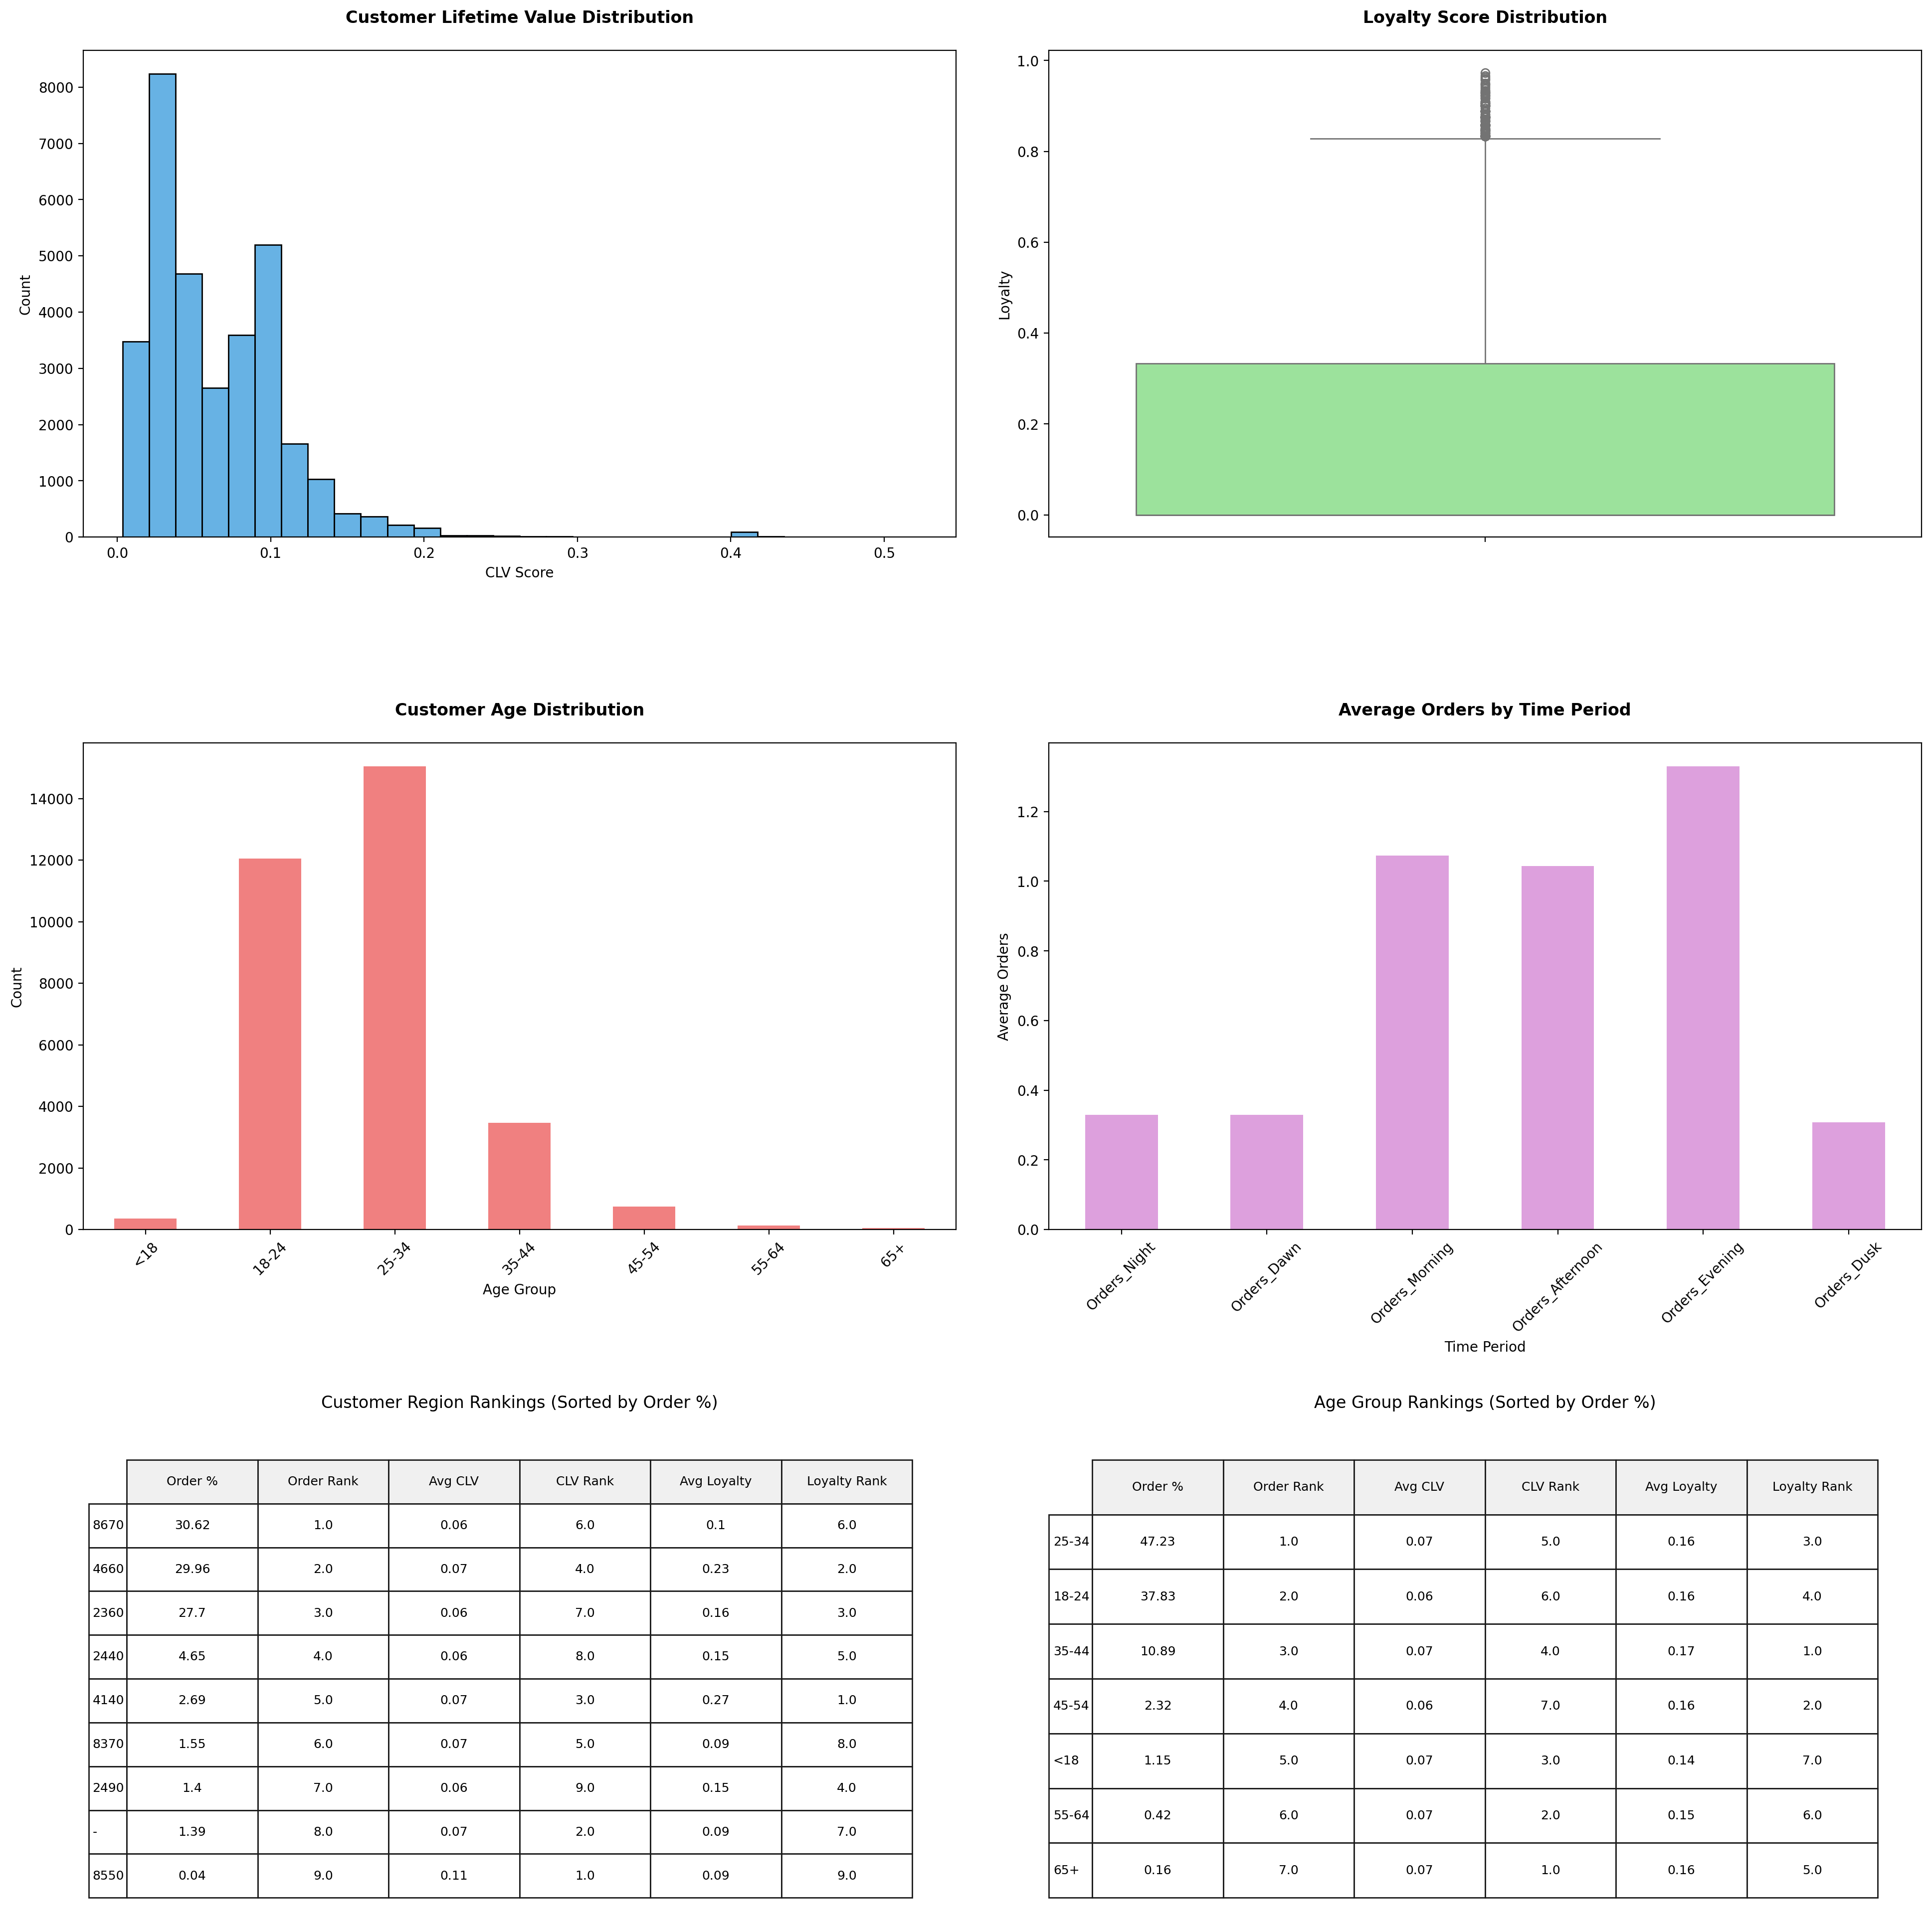


Detailed Rankings by Customer Region (sorted by Order %):
                 Order %  Order Rank  Avg CLV  CLV Rank  Avg Loyalty  Loyalty Rank
customer_region                                                                   
8670               30.62         1.0     0.06       6.0         0.10           6.0
4660               29.96         2.0     0.07       4.0         0.23           2.0
2360               27.70         3.0     0.06       7.0         0.16           3.0
2440                4.65         4.0     0.06       8.0         0.15           5.0
4140                2.69         5.0     0.07       3.0         0.27           1.0
8370                1.55         6.0     0.07       5.0         0.09           8.0
2490                1.40         7.0     0.06       9.0         0.15           4.0
-                   1.39         8.0     0.07       2.0         0.09           7.0
8550                0.04         9.0     0.11       1.0         0.09           9.0

Detailed Rankings by Age Gr

In [117]:
def visualize_customer_behavior(df):

    # Verify data is not empty
    if df.empty:
        raise ValueError("DataFrame is empty")

    # Check for null values in key columns
    key_columns = ['customer_region', 'CLV_Score', 'Loyalty', 'Age_Group', 'Peak_Time']
    null_counts = df[key_columns].isnull().sum()
    
    # Handle null values
    df_clean = df.copy()
    if null_counts['Loyalty'] > 0:
        print(f"Filling {null_counts['Loyalty']} null Loyalty_Score values with median")
        df_clean['Loyalty'].fillna(df_clean['Loyalty'].median(), inplace=True)
    
    if null_counts.any():
        print("Null values found in the following columns:")
        print(null_counts[null_counts > 0])

    # Create a figure with subplots
    plt.style.use('default')  # Use default style instead of seaborn
    fig = plt.figure(figsize=(20, 20))

    # 1. CLV Score Distribution
    plt.subplot(3, 2, 1)
    sns.histplot(data=df_clean, x='CLV_Score', bins=30, color='#3498DB')
    plt.title('Customer Lifetime Value Distribution', pad=20, fontsize=12, fontweight='bold')
    plt.xlabel('CLV Score')
    plt.ylabel('Count')

    # 2. Loyalty Score Distribution
    plt.subplot(3, 2, 2)
    sns.boxplot(data=df_clean, y='Loyalty', color='lightgreen')
    plt.title('Loyalty Score Distribution', pad=20, fontsize=12, fontweight='bold')

    # 3. Age Group Distribution
    plt.subplot(3, 2, 3)
    age_counts = df_clean['Age_Group'].value_counts().sort_index()
    age_counts.plot(kind='bar', color='lightcoral')
    plt.title('Customer Age Distribution', pad=20, fontsize=12, fontweight='bold')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # 4. Time Period Order Distribution
    plt.subplot(3, 2, 4)
    time_cols = ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
                 'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk']
    
    # Check if time columns exist
    available_time_cols = [col for col in time_cols if col in df_clean.columns]
    if available_time_cols:
        time_data = df_clean[available_time_cols].mean()
        time_data.plot(kind='bar', color='plum')
        plt.title('Average Orders by Time Period', pad=20, fontsize=12, fontweight='bold')
        plt.xlabel('Time Period')
        plt.ylabel('Average Orders')
        plt.xticks(rotation=45)
    else:
        plt.text(0.5, 0.5, 'Time period data not available', 
                horizontalalignment='center', verticalalignment='center')

    # 5. Customer Region Rankings
    plt.subplot(3, 2, 5)

    # Calculate metrics by customer_region
    region_stats = df_clean.groupby('customer_region').agg({
        'CLV_Score': 'mean',
        'Loyalty': 'mean',
        'customer_region': 'count'
    }).rename(columns={'customer_region': 'Count'})

    total_customers = len(df_clean)
    region_rankings = pd.DataFrame({
        'Order %': (region_stats['Count'] / total_customers * 100).round(2),
        'Order Rank': (region_stats['Count'] / total_customers * 100).rank(ascending=False),
        'Avg CLV': region_stats['CLV_Score'].round(2),
        'CLV Rank': region_stats['CLV_Score'].rank(ascending=False),
        'Avg Loyalty': region_stats['Loyalty'].round(2),
        'Loyalty Rank': region_stats['Loyalty'].rank(ascending=False)
    })

    region_rankings = region_rankings.sort_values('Order %', ascending=False)

    # Create table for region rankings with improved formatting
    table_region = plt.table(cellText=region_rankings.values,
                           rowLabels=region_rankings.index,
                           colLabels=region_rankings.columns,
                           cellLoc='center',
                           loc='center',
                           bbox=[0.05, 0.05, 0.9, 0.9])  # Adjusted bbox for better spacing

    table_region.auto_set_font_size(False)
    table_region.set_fontsize(9)
    for cell in table_region._cells:
        table_region._cells[cell].set_height(0.1)
        if cell[0] == 0:  # Header row
            table_region._cells[cell].set_facecolor('#f0f0f0')
        # Create a DataFrame from the table

    plt.axis('off')
    plt.title('Customer Region Rankings (Sorted by Order %)', pad=20, fontsize=12)

    # 6. Age Group Rankings
    plt.subplot(3, 2, 6)

    # Calculate metrics by Age_Group
    age_stats = df_clean.groupby('Age_Group').agg({
        'CLV_Score': 'mean',
        'Loyalty': 'mean',
        'Age_Group': 'count'
    }).rename(columns={'Age_Group': 'Count'})

    age_rankings = pd.DataFrame({
        'Order %': (age_stats['Count'] / total_customers * 100).round(2),
        'Order Rank': (age_stats['Count'] / total_customers * 100).rank(ascending=False),
        'Avg CLV': age_stats['CLV_Score'].round(2),
        'CLV Rank': age_stats['CLV_Score'].rank(ascending=False),
        'Avg Loyalty': age_stats['Loyalty'].round(2),
        'Loyalty Rank': age_stats['Loyalty'].rank(ascending=False)
    })

    age_rankings = age_rankings.sort_values('Order %', ascending=False)

    # Create table for age rankings with improved formatting
    table_age = plt.table(cellText=age_rankings.values,
                         rowLabels=age_rankings.index,
                         colLabels=age_rankings.columns,
                         cellLoc='center',
                         loc='center',
                         bbox=[0.05, 0.05, 0.9, 0.9])  # Adjusted bbox for better spacing

    table_age.auto_set_font_size(False)
    table_age.set_fontsize(9)
    for cell in table_age._cells:
        table_age._cells[cell].set_height(0.1)
        if cell[0] == 0:  # Header row
            table_age._cells[cell].set_facecolor('#f0f0f0')

    plt.axis('off')
    plt.title('Age Group Rankings (Sorted by Order %)', pad=20, fontsize=12)

    # Adjust layout to prevent overlap
    plt.tight_layout(pad=3.0)  # Increased padding

    # Display the plot
    plt.show()

    print("\nDetailed Rankings by Customer Region (sorted by Order %):")
    print(region_rankings.to_string())
    print("\nDetailed Rankings by Age Group (sorted by Order %):")
    print(age_rankings.to_string())

    return region_rankings, age_rankings

region_rankings, age_rankings = visualize_customer_behavior(df)